<a href="https://colab.research.google.com/github/phoevos/impi/blob/main/NN_Ex1_Team52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indlovu

> *Enter the cult...*


## Στοιχεία Ομάδας

> **Ομάδα 52:**
* Δούκας Θωμάς (03116081)
* Καλεμκερής Φοίβος-Ευστράτιος (03116010)
* Ψαρράς Ιωάννης (03116033)

In [ ]:
# install essential packages
!pip install -U pip
!pip install -U scikit-learn
!pip install -U numpy
!pip install -U pandas
!pip install -U imbalanced-learn
!pip install -U matplotlib
!pip install -U tensorflow

     |████████████████████████████████| 1.5MB 5.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 6.8 MB 6.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 14.5 MB 101 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.1

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.4)
     |████████████████████████████████| 167 kB 5.2 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3
     |████████████████████████████████| 11.6 MB 6.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 320.4 MB 22 kB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

datascience 0.10.6 requires folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


Συναρτήσεις που θα χρησιμοποιηθούν παρακάτω:

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def conf_matrix(pred,y_test, classifier,label_names, ex):
  mat = confusion_matrix(y_test, pred)
  if (ex == 2):
    plt.subplots(figsize=(20, 15))
  sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
              xticklabels=label_names,
              yticklabels=label_names)
  plt.ylabel('True')
  plt.xlabel('Predicted')
  plt.title(classifier + "Confusion matrix")
  plt.show()

## Μικρό dataset (S)
> [Quality Assessment of Digital Colposcopies](http://archive.ics.uci.edu/ml/datasets/Quality+Assessment+of+Digital+Colposcopies)

### Βασικές Πληροφορίες

1. Το dataset αφορά την υποκειμενική αξιολόγηση της ποιότητας ψηφιακών κολποσκοπήσεων. Ειδικότερα, αποτελείται από ένα σύνολο ιατρικών μετρήσεων και μεγεθών που προέκυψαν από τη δειγματοληψία βίντεο ψηφιακών κολποσκοπήσεων, αλλά και τις αξιολογήσεις (bad, good) των κολποσκοπήσεων από 6 ειδικούς, από τις οποίες προκύπτει και το τελικό συμπέρασμα (consensus) σχετικά με την ποιότητα της κολποσκόπησης.

2. Το dataset αποτελείται από 287 δείγματα. Αυτά περιλαμβάνουν τιμές για 69 attributes, εκ των οποίων τα 62 αντιστοιχούν στα χαρακτηριστικά, ενώ τα υπόλοιπα σε δεδομένα εξόδου που αντιστοιχούν στις γνωμοδοτήσεις των ειδικών. Σύμφωνα με τη σελίδα του repository τα χαρακτηριστικά αυτά είναι τύπου real, ενώ δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά. 



3. Υπάρχουν επικεφαλίδες, αλλά όχι αρίθμηση γραμμών.

In [ ]:
import pandas as pd
import numpy as np

green = pd.read_csv("green.csv")
schiller = pd.read_csv("schiller.csv")
hins = pd.read_csv("hinselmann.csv")

# check for headers
print(green.columns.values, '\n')

colp = np.concatenate((green, schiller, hins), axis=0)

print(colp, '\n') # no line numbering
print('(Instances, Attributes):', colp.shape) # 287 instances, 69 attributes

['cervix_area' 'os_area' 'walls_area' 'speculum_area' 'artifacts_area'
 'cervix_artifacts_area' 'os_artifacts_area' 'walls_artifacts_area'
 'speculum_artifacts_area' 'cervix_specularities_area'
 'os_specularities_area' 'walls_specularities_area'
 'speculum_specularities_area' 'specularities_area' 'area_h_max_diff'
 'rgb_cervix_r_mean' 'rgb_cervix_r_std' 'rgb_cervix_r_mean_minus_std'
 'rgb_cervix_r_mean_plus_std' 'rgb_cervix_g_mean' 'rgb_cervix_g_std'
 'rgb_cervix_g_mean_minus_std' 'rgb_cervix_g_mean_plus_std'
 'rgb_cervix_b_mean' 'rgb_cervix_b_std' 'rgb_cervix_b_mean_minus_std'
 'rgb_cervix_b_mean_plus_std' 'rgb_total_r_mean' 'rgb_total_r_std'
 'rgb_total_r_mean_minus_std' 'rgb_total_r_mean_plus_std'
 'rgb_total_g_mean' 'rgb_total_g_std' 'rgb_total_g_mean_minus_std'
 'rgb_total_g_mean_plus_std' 'rgb_total_b_mean' 'rgb_total_b_std'
 'rgb_total_b_mean_minus_std' 'rgb_total_b_mean_plus_std'
 'hsv_cervix_h_mean' 'hsv_cervix_h_std' 'hsv_cervix_s_mean'
 'hsv_cervix_s_std' 'hsv_cervix_v_mean'



---


4. Στο αρχικό dataset υπάρχουν 7 target variables. Σύμφωνα με το FAQ της άσκησης, ωστόσο, καλούμαστε να θεωρήσουμε το πρόβλημα ταξινόμησης ως binary, λαμβάνοντας υπόψη ως target μόνο το consensus, το οποίο εμφανίζεται στην τελευταία (69η) στήλη του πίνακα.

In [ ]:
label = colp[:, 68].astype(int) # convert real to int
print(label, '\n')

# labels
print('Labels:', np.unique(label)) # binary: 1 -> good, 0 -> bad

[1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1] 

Labels: [0 1]


---

5. Aφαιρέσαμε τα headers κατά τη συνένωση των csv και μετατροπή του dataframe σε numpy array.


6. Δεν υπάρχουν απουσιάζουσες τιμές.

In [ ]:
# are there any missing values?
missing = np.isin(np.NaN, colp)
print(missing)

False


---

7. Όπως είδαμε και προηγουμένως, οι κλάσεις είναι 2: good (1) και bad (0). Όπως προκύπτει, το dataset δεν είναι ισορροπημένο, αφού το 75.261% το δειγμάτων αντιστοιχούν σε good, ενώ μόνο το 24.739% σε bad.

In [ ]:
freq = np.bincount(label)
con = freq[1]
dis = freq[0]
print('(1) Good:', con, 'instances,', '{:.3%}'.format(con/(con+dis)), 
      '\n(0) Bad:', dis, 'instances,', '{:.3%}'.format(dis/(con+dis)))

(1) Good: 216 instances, 75.261% 
(0) Bad: 71 instances, 24.739%


---

8. Όπως αναφέραμε ήδη δεν υπάρχουν απουσιάζουσες και κατηγορικές τιμές. Ως εκ τούτου, προχωράμε κατευθείαν στο διαχωρισμό του dataset. Επισημαίνουμε ότι εφόσον έχουμε θεωρήσει ως μοναδική target μεταβλητή το consensus, τα features που αντιστοιχούν στις γνωμοδοτήσεις των ειδικών (expert::X (X in 0,...,5)) θα πρέπει να αφαιρεθούν. Για το λόγο αυτό, στον παρακάτω κώδικα λαμβάνουμε μόνο τις 62 πρώτες στήλες του πίνακα που αντιστοιχούν στα χαρακτηριστικά.

In [ ]:
from sklearn.model_selection import train_test_split

data = colp[:, :62]
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2)

### Ταξινόμηση

#### Baseline classification

Αρχικά, εκπαιδεύουμε τους classifiers χρησιμοποιώντας τις default τιμές τους. Στη συνέχεια, ο κάθε ταξινομητής κάνει εκτιμήσεις πάνω στο test set και έπειτα υπολογίζονται οι πίνακες σύγχυσης για κάθε classifier, ενώ εμφανίζουμε και τα precision, recall και f1 για average micro και macro. Τέλος, οι τιμές του f1 των ταξινομητών συγκρίνονται σε 2 διαγράμματα, ένα για micro-avegare και ένα για macro-average.<br>

* Dummy Classifier :

  Έπειτα από μελέτη του confusion matrix παρατηρείται ότι 3 από τα 58 instances του test set ταξινομήθηκαν ορθά ως bad (true negatives) και 31 ορθά ως good (true positives). Αντίθετα, προέκυψαν 13 λανθασμένες προβλέψεις bad (false negatives) και 11 λανθασμένες προβλέψεις good (false positives).<br>
  Επιπλέον, παρατηρείται σημαντική διαφορά στον υπολογισμό των precision, recall και f1 μεταξύ των δύο χρησιμοποιούμενων average metrics, καθώς στην περίπτωση του micro-average οι παραπάνω τιμές προκύπτουν αισθητά μεγαλύτερες.<br>

* Gaussian Naive Bayes :  

  Από το confussion matrix για τον GNB προκύπτουν 6 ορθά bad (tn), 40 ορθά good (tp), 4 λανθασμένα bad (fn) και 8 λανθασμένα good (fp).<br>
  Όσον αφορά τις τιμές των precision, recall και f1, είναι και οι τρεις εμφανώς βελτιωμένες σε σχέση με αυτές του Dummy Classifier, ενώ πάλι παρατηρείται σημαντική διαφορά υπέρ της περίπτωσης του micro-average.<br>

* kNN :  

  Το confusion matrix του ταξινομητή μας πληροφορεί πως 2 instances ταξινομηθηκάν ορθά ως bad (tn), 41 ταξινομήθηκαν ορθά ως good (tp), 3 λανθασμένα ως bad (fn) και 12 λανθασμένα ως good (fp).<br>
  Τα precision, recall και f1 βρίσκονται ενδιάμεσα στις αντίστοιχες τιμές τους για τους 2 προηγούμενους classifiers και ξανά η τιμή τους για micro-average είναι αισθητά μεγαλύτερη.

Dummy Classifier:


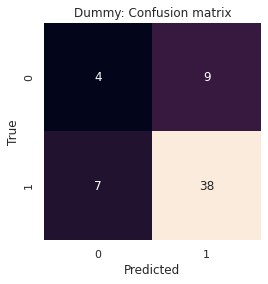

-----------------------------------
Micro:
  Precision: 0.7241379310344828
  Recall: 0.7241379310344828
  f1-micro: 0.7241379310344829
-----------------------------------
Macro:
  Precision: 0.586073500967118
  Recall: 0.576068376068376
  f1-macro: 0.5797101449275363
-----------------------------------

Gaussian Naive Bayes Classifier:


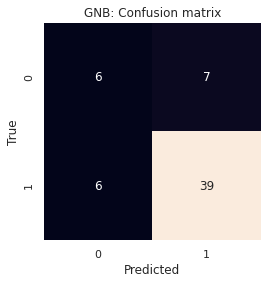

-----------------------------------
Micro:
  Precision: 0.7758620689655172
  Recall: 0.7758620689655172
  f1-micro: 0.7758620689655173
-----------------------------------
Macro:
  Precision: 0.6739130434782609
  Recall: 0.6641025641025642
  f1-macro: 0.6685714285714286
-----------------------------------

kNN Classifier:


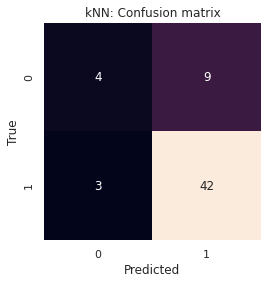

-----------------------------------
Micro:
  Precision: 0.7931034482758621
  Recall: 0.7931034482758621
  f1-micro: 0.7931034482758621
-----------------------------------
Macro:
  Precision: 0.6974789915966386
  Recall: 0.6205128205128205
  f1-macro: 0.6375
---------------------------------------------------



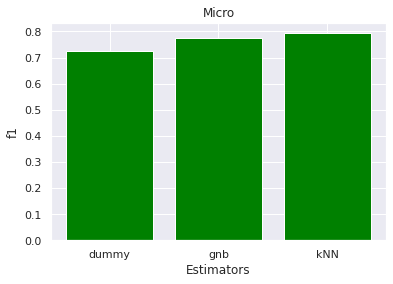

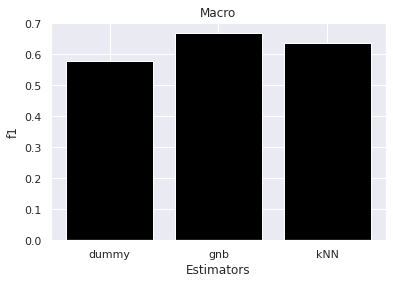

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt

dc = DummyClassifier() # strategy: default="stratified"
gnb = GaussianNB() # default parameters
knn = KNeighborsClassifier() # n_neighbors: default=5

dc_model = dc.fit(X_train, y_train)
gnb_model = gnb.fit(X_train, y_train)
knn_model = knn.fit(X_train, y_train)

dc_preds = dc.predict(X_test)
gnb_preds = gnb.predict(X_test)
knn_preds = knn.predict(X_test)

print("Dummy Classifier:")
dc_cr = precision_recall_fscore_support(y_test, dc_preds, average='micro')
conf_matrix(dc_preds, y_test, "Dummy: ", ["0", "1"], 1)
print("-----------------------------------")
print("Micro:")
print("  Precision:", dc_cr[0])
print("  Recall:", dc_cr[1])
print("  f1-micro:", dc_cr[2])
print("-----------------------------------")
dc_cr2 = precision_recall_fscore_support(y_test, dc_preds, average='macro')
print("Macro:")
print("  Precision:", dc_cr2[0])
print("  Recall:", dc_cr2[1])
print("  f1-macro:", dc_cr2[2])
print("-----------------------------------\n")

print("Gaussian Naive Bayes Classifier:")
gnb_cr = precision_recall_fscore_support(y_test, gnb_preds, average='micro')
conf_matrix(gnb_preds, y_test, "GNB: ", ["0", "1"], 1)
print("-----------------------------------")
print("Micro:")
print("  Precision:", gnb_cr[0])
print("  Recall:", gnb_cr[1])
print("  f1-micro:", gnb_cr[2])
print("-----------------------------------")
gnb_cr2 = precision_recall_fscore_support(y_test, gnb_preds, average='macro')
print("Macro:")
print("  Precision:", gnb_cr2[0])
print("  Recall:", gnb_cr2[1])
print("  f1-macro:", gnb_cr2[2])
print("-----------------------------------\n")

print("kNN Classifier:")
knn_cr = precision_recall_fscore_support(y_test, knn_preds, average='micro')
conf_matrix(knn_preds, y_test, "kNN: ", ["0", "1"], 1)
print("-----------------------------------")
print("Micro:")
print("  Precision:", knn_cr[0])
print("  Recall:", knn_cr[1])
print("  f1-micro:", knn_cr[2])
print("-----------------------------------")
knn_cr2 = precision_recall_fscore_support(y_test, knn_preds, average='macro')
print("Macro:")
print("  Precision:", knn_cr2[0])
print("  Recall:", knn_cr2[1])
print("  f1-macro:", knn_cr2[2])
print("---------------------------------------------------\n")

plt.bar(["dummy", "gnb", "kNN"], [dc_cr[2], gnb_cr[2], knn_cr[2]], color="green")
plt.title("Micro")
plt.xlabel("Estimators")
plt.ylabel("f1")
plt.show()

plt.bar(["dummy", "gnb", "kNN"], [dc_cr2[2], gnb_cr2[2], knn_cr2[2]], color="black")
plt.title("Macro")
plt.xlabel("Estimators")
plt.ylabel("f1")
plt.show()

Συνολικά, όπως αποδεικνύεται έπειτα από μελέτη των διαγραμμάτων, ο GNB classifier πετυχαίνει καλύτερο fscore από τους άλλους δύο classifiers και στην περίπτωση του micro-average αλλά και σε αυτήν του macro-average.  

Ιδανικά, επιθυμούμε η διαδικασία να επιφέρει ταυτόχρονη μεγιστοποίηση των μετρικών ακρίβειας (Precision) και ανάκλησης (Recall). Ωστόσο στην πράξη αυτό δεν είναι εφικτό, καθώς μέιωση του ενός μεγέθους συνοδέυεται από αύξηση του άλλου. Λόγω της προηγούμενης παρατήρησης θα εστιάσουμε την προσοχή μας στην αξιολόγηση του αρμονικού μέσου των μετρικών (f1 score).

Για το συγκεκριμένο dataset, πάντως, αξίζει να προσέξουμε περισσότερο τη συμπεριφορά των micro averaged τιμών, διότι σε αυτές απεικονίζεται με μεγαλύτερη πιστότητα η πραγματικότητα. Ειδικότερα, όπως αναφέραμε, το σύνολο δεδομένων των ψηφιακών κολποσκοπήσεων είναι έντονα μη ισορροπημένο, με το 75% περίπου των δειγμάτων να αντιστοιχούν στην κλάση 1 και μόλις το 25% στην κλάση 0. Συνεπώς, αν λάβουμε τον macro μέσο όρο, ο οποίος ζυγίζει ισάξια όλα τα αποτελέσματα των προβλέψεων, η τιμή του θα κυριαρχείται από την επίδοση των ταξινομητών στην πρόβλεψη της συχνότερης κλάσης. Εμείς, ωστόσο, ενδιαφέρομαστε για την επίδοση των ταξινομητών σε οποιαδήποτε τυχαία είσοδο και έχοντας αυτό υπόψη θα κινηθούμε στη συνέχεια για τη βελτιστοποίηση των ταξινομητών, δίνοντας μεγαλύτερη βαρύτητα στην μετρική f1-micro για την επιλογή των βέλτιστων αρχιτεκτονικών. Προβλέπουμε, δε, ότι η χρήση ενός oversampler στο pipeline θα συνεισφέρει σημαντικά στη βελτίωση της επίδοσης όλων των προβλεπτών.

#### Βελτιστοποίηση Ταξινομητών

Θα αναζητήσουμε τη βέλτιστη αρχιτεκτονική για κάθε ταξινομητή. Θα ξεκινήσουμε κάθε φορά από τον απλό ταξινομητή και θα συνεχίσουμε προσθέτοντας μετασχηματιστές στην είσοδό του, μέχρι να βρούμε την καλύτερη αρχιτεκτονική (bottom-up approach).

  

* #####  Dummy Classifier

Θα μελετήσουμε, αρχικά, την περίπτωση του Dummy Classifier. Ο συγκεκριμένος ταξινομητής χρησιμοποιεί by default τη στρατηγική stratified, σύμφωνα με την οποία λαμβάνει υπόψη για τις αποφάσεις του την κατανομή των δειγμάτων σε κλάσεις. Στην προκειμένη περίπτωση, δηλαδή, εφόσον η αναλογία των δύο κλάσεων είναι 75-25, στο 75% των περιπτώσεων ο ταξινομητής θα αποφασίζει '1'. Όπως γίνεται αντιληπτό, ένας τέτοιος ταξινομητής δε μαθαίνει. Για το λόγο αυτό, οποιαδήποτε περαιτέρω επεξεργασία των δεδομένων μετά το χωρισμό του dataset σε train/test set κρίνεται ανούσια, αφού ο Dummy Classifier, δε βασίζει την απόφασή του στα χαρακτηριστικά των δειγμάτων. Επομένως, θεωρούμε ότι δε βελτιστοποιείται και θα χρησιμοποιήσουμε στη συνέχεια- για την ενότητα Βέλτιστη αρχιτεκτονική-  ένα pipeline που αποτελείται μόνο από τον ταξινομητή, όπως τον είδαμε και στο Baseline classification.

* ##### GNB Classifier

Θα μελετήσουμε, ακολούθως, την περίπτωση του Gaussian Naive Bayes Classifier. Σε αντίθεση με τον προηγούμενο ταξινομητή, ο GNB, έχει πολλά περιθώρια βελτιστοποίησης. Ξεκινήσαμε τη διαδικασία αναζήτησης της βέλτιστης αρχιτεκτονικής τοποθετώντας στο pipeline μόνο τον ταξινομητή και αρχίσαμε να προσθέτουμε σταδιακά μετασχηματιστές μπροστά του, λαμβάνοντας μετρήσεις των επιδόσεων του εκτιμητή ως προς δύο μετρικές, τα f1-micro και f1-macro. Για κάθε μια από τις παραμέτρους των μετασχηματιστών (π.χ. κατώφλι διακύμανσης για τον selector, αριθμός συνιστωσών για το PCA), δοκιμάσαμε πρώτα τις προτεινόμενες τιμές, εκτελώντας grid search. Ύστερα, πραγματοποιήσαμε κάθε φορά την ακόλουθη διαδικασία βελτιστοποίησης:

1.   Παρατήρηση βέλτιστων παραμέτρων, όπως προκύπτουν από το grid search
2.   Αν αυτές βρίσκονται στα άκρα του διαστήματος αναζήτησης, προσθέτουμε σ' αυτό τιμές, ώστε η παράμετρος που προέκυψε προηγουμένως, να βρίσκεται τώρα περίπου στο κέντρο του διαστήματος. Επαναλαμβάνουμε το grid search.
3.   Όταν η παράμετρος βρίσκεται στο κέντρο του διαστήματος της αναζήτησης, πετάμε ορισμένες από τις ακραίες τιμές και προσθέτουμε τιμές γύρω από εκείνη που προκρίθηκε προηγουμένως ως βέλτιστη.
4.   Επαναλαμβάνουμε το grid search μέχρι να σταθεροποιηθεί η τιμή της υπό εξέτασης παραμέτρου.

Για κάθε αρχιτεκτονική που δοκιμάσαμε, τα αποτελέσματα παρατίθενται στον ακόλουθο πίνακα.

<br>

| #Arch 	| Selector 	| Scaler 	| Sampler 	| PCA 	| F1_micro 	| F1_macro 	|
|:------:	|:--------:	|:------:	|:-------:	|:---:	|:--------:	|:--------:	|
|    1   	|          	|        	|         	|     	|   0.776  	|   0.669  	|
|    2   	|     X    	|        	|         	|     	|   0.776  	|   0.669  	|
|    3   	|          	|    X   	|         	|     	|   0.776  	|   0.669  	|
|    4   	|          	|        	|    X    	|     	|   0.845  	|   0.771  	|
|    5   	|          	|        	|         	|  X  	|   0.724  	|   0.655  	|
|    6   	|     X    	|    X  	|         	|     	|   0.776  	|   0.669  	|
|    7   	|     X    	|        	|    X    	|     	|   0.827  	|   0.752  	|
|    8   	|          	|    X   	|    X    	|     	|   0.759  	|   0.685  	|
|    9   	|          	|        	|    X    	|  X  	|   0.81   	|   0.734  	|
|   10   	|     X    	|    X   	|    X    	|     	|   0.759  	|   0.67   	|
|   11    |           |    X    |    X      |  X    |   0.69    |   0.612   |
|   12   	|     X    	|    X   	|         	|  X  	|   0.759   |   0.584  	|
|   13   	|     X    	|    X   	|    X    	|  X  	|   0.69   	|   0.64   	|

<br>

Όπως προκύπτει από τα παραπάνω η βέλτιστη αρχιτεκτονική για τον GNB είναι η 4, δηλαδή pipeline που αποτελείται μόνο από τον Oversampler μπροστά απ' τον ταξινομητή. Είναι γεγονός ότι στο έντονα μη ισορροπημένο dataset που μελετάμε ο oversampler πέτυχε σημαντική βελτίωση συγκριτικά με τη Baseline περίπτωση και για τις δύο μετρικές. Από τους υπόλοιπους μετασχηματιστές κανείς δε συνεισφέρει στη βελτίωση της πρόβλεψης και για το λόγο αυτό δε θα συμπεριληφθούν στο pipeline της βέλτιστης αρχιτεκτονικής.

* ##### kNN Classifier

Tέλος, θα μελετήσουμε την περίπτωση του kNN Classifier. Όπως και στην περίπτωση του GNB, ξεκινήσαμε τη διαδικασία αναζήτησης της βέλτιστης αρχιτεκτονικής τοποθετώντας στο pipeline μόνο τον ταξινομητή και αρχίσαμε να προσθέτουμε σταδιακά μετασχηματιστές μπροστά του, λαμβάνοντας μετρήσεις των επιδόσεων ως προς τα f1-micro και f1-macro. Για κάθε μια από τις παραμέτρους των μετασχηματιστών (π.χ. κατώφλι διακύμανσης για τον selector, αριθμός συνιστωσών για το PCA), εκτελέσαμε grid search, εξετάζοντας πρώτα τις προτεινόμενες τιμές. Ύστερα, πραγματοποιήσαμε κάθε φορά την επαναληπτική διαδικασία βελτιστοποίησης που περιγράψαμε προηγουμένως.  
Την ίδια διαδικασία ακολουθήσαμε και για την υπερπαράμετρο k (neighbours) του ταξινομητή. Για κάθε αρχιτεκτονική που δοκιμάσαμε, τα αποτελέσματα παρατίθενται στον ακόλουθο πίνακα.

<br>

| #Arch | Selector | Scaler | Sampler | PCA | F1_micro | F1_macro |
|:-----:|:--------:|:------:|:-------:|:---:|:--------:|:--------:|
|   1   |          |        |         |     |   0.793  |   0.638  |
|   2   |     X    |        |         |     |   0.793  |   0.516  |
|   3   |          |    X   |         |     |   0.776  |   0.437  |
|   4   |          |        |    X    |     |   0.759  |   0.607  |
|   5   |          |        |         |  X  |   0.793  |   0.593  |
|   6   |     X    |    X   |         |     |   0.810  |   0.485  |
|   7   |     X    |        |    X    |     |   0.672  |   0.516  |
|   8   |          |    X   |    X    |     |   0.828  |   0.698  |
|   9   |          |        |    X    |  X  |   0.741  |   0.593  |
|  10   |     X    |    X   |    X    |     |   0.810  |   0.654  |
|  11   |          |    X   |    X    |  X  |   0.810  |   0.638  |
|  12   |     X    |    X   |         |  X  |   0.776  |   0.437  |
|  13   |     X    |    X   |    X    |  X  |   0.810  |   0.654  |

<br>

Όπως προκύπτει από τα παραπάνω, η βέλτιστη αρχιτεκτονική για τον kNN είναι η 8, δηλαδή pipeline που αποτελείται μόνο από τον Scaler και τον Oversampler μπροστά απ' τον ταξινομητή. Ο δεύτερος ήταν αναμενόμενο να αποδειχθεί χρήσιμος, εξαιτίας της ανισοκατανομής των κλάσεων στο αρχικό dataset. Όσον αφορά, δε, τον scaler, παρατηρούμε ότι ενώ από μόνος του μάλλον χειροτερεύει την απόδοση του εκτιμητή, αν συνδυαστεί με τον oversampler (ή δευτερευόντως με τον επιλογέα χαρακτηριστικών), δύναται να βοηθήσει στη βελτίωση τον προβλέψεων.

##### Βέλτιστη αρχιτεκτονική

Στη συνέχεια θα παρουσιάσουμε για κάθε έναν από τους προηγούμενους εκτιμητές τη βέλτιση αρχιτεκτονική, όπως αυτή προέκυψε από το grid search. Στο ακόλουθο κομμάτι κώδικα αρχικοποιούμε τα pipeline, σύμφωνα με όσα αναφέραμε παραπάνω.

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

from imblearn.pipeline import Pipeline

# preprocessors
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# initialize
scaler = StandardScaler()
ros = RandomOverSampler()
dc = DummyClassifier() # strategy: default="stratified"
gnb = GaussianNB()
kNN = KNeighborsClassifier(n_jobs=-1) # use all cores
pipe_dc = Pipeline(steps=[('dc', dc)], memory = 'tmp')
pipe_gnb = Pipeline(steps=[('sampler', ros), ('gnb', gnb)], memory = 'tmp')
pipe_kNN = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('kNN', kNN)], memory = 'tmp')

Στη συνέχεια, εκτελούμε το grid search 2 φορές για κάθε εκτιμητή, μια χρησιμοποιώντας το f1-micro ως μετρική αξιολόγησης και μια το f1-macro. Προκύπτουν, επομένως, για κάθε ταξινομητή μία βέλτιστη κατά f1-micro αρχιτεκτονική και μία βέλτιστη κατά f1-macro. Βλέπουμε ότι για το k, που αποτελεί τη βασική υπερπαράμετρο προς βελτιστοποίηση έχουμε λάβει ένα ευρύ διάστημα τιμών που θα χρησιμοποιηθούν κατά την εξαντλητική αναζήτηση, το οποίο βρίσκεται γύρω από τις τιμές 47 και 59 που προέκυψαν κατά την προηγούμενη φάση ως βέλτιστος αριθμός γειτόνων. Χρησιμοποιούμε σχήμα 10-fold cross-validation. Στο τέλος, τυπώνουμε το συνολικό χρόνο για την ολοκλήρωση του fit και του predict για κάθε εκτιμητή.

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

k = [41, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67] 

estimator_dc_micro = GridSearchCV(pipe_dc, dict(), cv=10, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator_dc_micro.fit(X_train, y_train)
preds_dc_micro = estimator_dc_micro.predict(X_test)
print("Dummy Micro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_dc_macro = GridSearchCV(pipe_dc, dict(), cv=10, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator_dc_macro.fit(X_train, y_train)
preds_dc_macro = estimator_dc_macro.predict(X_test)
print("Dummy Macro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_gnb_micro = GridSearchCV(pipe_gnb, dict(), cv=10, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator_gnb_micro.fit(X_train, y_train)
preds_gnb_micro = estimator_gnb_micro.predict(X_test)
print("GNB Micro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_gnb_macro = GridSearchCV(pipe_gnb, dict(), cv=10, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator_gnb_macro.fit(X_train, y_train)
preds_gnb_macro = estimator_gnb_macro.predict(X_test)
print("GNB Macro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_kNN_micro = GridSearchCV(pipe_kNN, dict(kNN__n_neighbors=k), cv=10, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator_kNN_micro.fit(X_train, y_train)
preds_kNN_micro = estimator_kNN_micro.predict(X_test)
print("kNN Micro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_kNN_macro = GridSearchCV(pipe_kNN, dict(kNN__n_neighbors=k), cv=10, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator_kNN_macro.fit(X_train, y_train)
preds_kNN_macro = estimator_kNN_macro.predict(X_test)
print("kNN Macro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

Dummy Micro:
Συνολικός χρόνος fit και predict: 0.046024322509765625 seconds
-------------------------------------------------------------
Dummy Macro:
Συνολικός χρόνος fit και predict: 0.03711104393005371 seconds
-------------------------------------------------------------
GNB Micro:
Συνολικός χρόνος fit και predict: 0.06500124931335449 seconds
-------------------------------------------------------------
GNB Macro:
Συνολικός χρόνος fit και predict: 0.06453156471252441 seconds
-------------------------------------------------------------
kNN Micro:
Συνολικός χρόνος fit και predict: 7.626700162887573 seconds
-------------------------------------------------------------
kNN Macro:
Συνολικός χρόνος fit και predict: 7.53494930267334 seconds
-------------------------------------------------------------


Στη συνέχεια εμανίζουμε τις παραμέτρους για τις καλύτερες υλοποίησεις των εκτιμητών, όπως αυτές προέκυψαν από το grid search.

In [ ]:
dc_macro = estimator_dc_macro.best_estimator_
dc_micro = estimator_dc_micro.best_estimator_
gnb_macro = estimator_gnb_macro.best_estimator_
gnb_micro = estimator_gnb_micro.best_estimator_
kNN_macro = estimator_kNN_macro.best_estimator_
kNN_micro = estimator_kNN_micro.best_estimator_

print("Dummy Micro Best Parameters:", estimator_dc_micro.best_params_, "\n")
print("Dummy Macro Best Parameters:", estimator_dc_macro.best_params_)
print("------------------------------------------------------------------------------")
print("GNB Micro Best Parameters:", estimator_gnb_micro.best_params_, "\n")
print("GNB Macro Best Parameters:", estimator_gnb_macro.best_params_)
print("------------------------------------------------------------------------------")
print("kNN Micro Best Parameters:", estimator_kNN_micro.best_params_, "\n")
print("kNN Macro Best Parameters:", estimator_kNN_macro.best_params_)
print("------------------------------------------------------------------------------")

Dummy Micro Best Parameters: {} 

Dummy Macro Best Parameters: {}
------------------------------------------------------------------------------
GNB Micro Best Parameters: {} 

GNB Macro Best Parameters: {}
------------------------------------------------------------------------------
kNN Micro Best Parameters: {'kNN__n_neighbors': 59} 

kNN Macro Best Parameters: {'kNN__n_neighbors': 47}
------------------------------------------------------------------------------


Τέλος, εκπαιδεύουμε τους εκτιμητές που προκρίναμε ως βέλτιστους και τους χρησιμοποιούμε προκειμένου να κάνουμε predict στο test set. Για τον καθένα εξ αυτών εμφανίζουμε τις τιμές precision και recall, καθώς και τα f1-scores. Εμφανίζουμε, επιπλέον, τα confusion matrices.

Dummy Classifier:
Micro:
  Precision: 0.6379310344827587
  Recall: 0.6379310344827587
  f1-micro: 0.6379310344827587


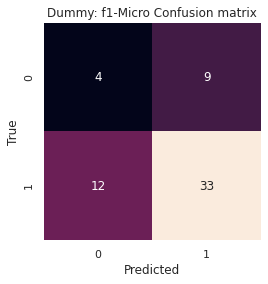

-----------------------------------
Macro:
  Precision: 0.5042735042735043
  Recall: 0.5042735042735043
  f1-macro: 0.5042735042735043


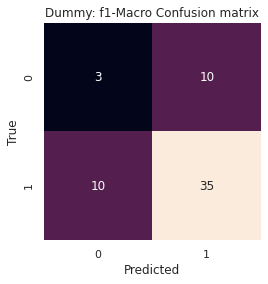

-----------------------------------

Gaussian Naive Bayes Classifier:
Micro:
  Precision: 0.8448275862068966
  Recall: 0.8448275862068966
  f1-micro: 0.8448275862068967


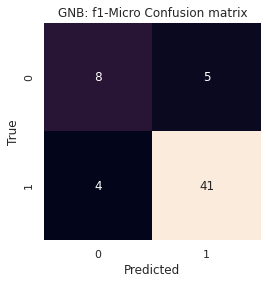

-----------------------------------
Macro:
  Precision: 0.7789855072463767
  Recall: 0.7632478632478632
  f1-macro: 0.7705494505494506


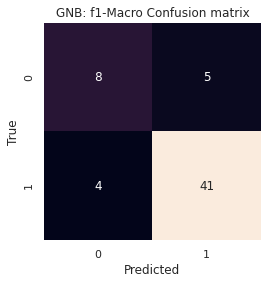

-----------------------------------

kNN Classifier:
Micro:
  Precision: 0.8275862068965517
  Recall: 0.8275862068965517
  f1-micro: 0.8275862068965517


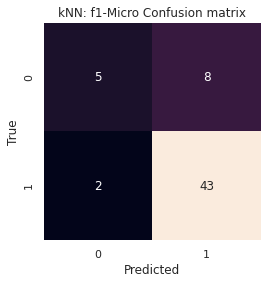

-----------------------------------
Macro:
  Precision: 0.7467948717948718
  Recall: 0.6316239316239316
  f1-macro: 0.6538252848616386


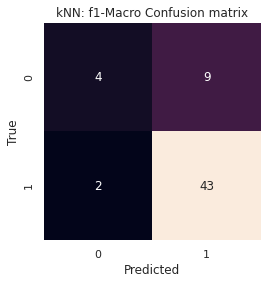

In [ ]:
dc_macro.fit(X_train, y_train)
preds_dc_macro = dc_macro.predict(X_test)

dc_micro.fit(X_train, y_train)
preds_dc_micro = dc_micro.predict(X_test)

gnb_macro.fit(X_train, y_train)
preds_gnb_macro = gnb_macro.predict(X_test)

gnb_micro.fit(X_train, y_train)
preds_gnb_micro = gnb_micro.predict(X_test)

kNN_macro.fit(X_train, y_train)
preds_kNN_macro = kNN_macro.predict(X_test)

kNN_micro.fit(X_train, y_train)
preds_kNN_micro = kNN_micro.predict(X_test)

print("Dummy Classifier:")
dc_cr = precision_recall_fscore_support(y_test, preds_dc_micro, average='micro')
print("Micro:")
print("  Precision:", dc_cr[0])
print("  Recall:", dc_cr[1])
print("  f1-micro:", dc_cr[2])
conf_matrix(preds_dc_micro, y_test, "Dummy: f1-Micro ", ["0", "1"], 1)
print("-----------------------------------")
dc_cr2 = precision_recall_fscore_support(y_test, preds_dc_macro, average='macro')
print("Macro:")
print("  Precision:", dc_cr2[0])
print("  Recall:", dc_cr2[1])
print("  f1-macro:", dc_cr2[2])
conf_matrix(preds_dc_macro, y_test, "Dummy: f1-Macro ", ["0", "1"], 1)
print("-----------------------------------\n")

print("Gaussian Naive Bayes Classifier:")
gnb_cr = precision_recall_fscore_support(y_test, preds_gnb_micro, average='micro')
print("Micro:")
print("  Precision:", gnb_cr[0])
print("  Recall:", gnb_cr[1])
print("  f1-micro:", gnb_cr[2])
conf_matrix(preds_gnb_micro, y_test, "GNB: f1-Micro ", ["0", "1"], 1)
print("-----------------------------------")
gnb_cr2 = precision_recall_fscore_support(y_test, preds_gnb_macro, average='macro')
print("Macro:")
print("  Precision:", gnb_cr2[0])
print("  Recall:", gnb_cr2[1])
print("  f1-macro:", gnb_cr2[2])
conf_matrix(preds_gnb_macro, y_test, "GNB: f1-Macro ", ["0", "1"], 1)
print("-----------------------------------\n")

print("kNN Classifier:")
knn_cr = precision_recall_fscore_support(y_test, preds_kNN_micro, average='micro')
print("Micro:")
print("  Precision:", knn_cr[0])
print("  Recall:", knn_cr[1])
print("  f1-micro:", knn_cr[2])
conf_matrix(preds_kNN_micro, y_test, "kNN: f1-Micro ", ["0", "1"], 1)
print("-----------------------------------")
knn_cr2 = precision_recall_fscore_support(y_test, preds_kNN_macro, average='macro')
print("Macro:")
print("  Precision:", knn_cr2[0])
print("  Recall:", knn_cr2[1])
print("  f1-macro:", knn_cr2[2])
conf_matrix(preds_kNN_macro, y_test, "kNN: f1-Macro ", ["0", "1"], 1)

Στη συνέχεια παρουσιάζουμε τα συγκριτικά διαγράμματα των τριών προβλεπτών για τις δύο μετρικές, f1-micro και f1-macro, αντίστοιχα.

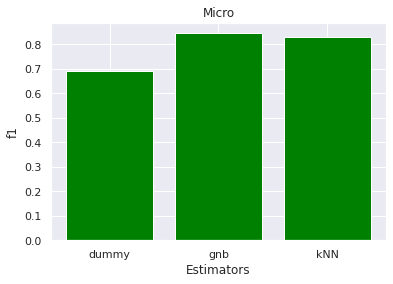

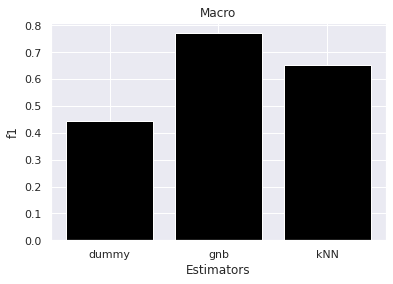

In [ ]:
plt.bar(["dummy", "gnb", "kNN"], [dc_cr[2], gnb_cr[2], knn_cr[2]], color="green")
plt.title("Micro")
plt.xlabel("Estimators")
plt.ylabel("f1")
plt.show()

plt.bar(["dummy", "gnb", "kNN"], [dc_cr2[2], gnb_cr2[2], knn_cr2[2]], color="black")
plt.title("Macro")
plt.xlabel("Estimators")
plt.ylabel("f1")
plt.show()

###### Σχολιασμός αποτελεσμάτων

Όπως παρατηρούμε παραπάνω, με την εξαίρεση του Dummy classifier, η απόδοση του οποίου δεν μπορεί να βελτιστοποιηθεί, έχουμε πετύχει μια σημαντική βελτίωση των ταξινομητών μας. Παρουσιάζουμε, εν συνεχεία, τα αποτελέσματα πριν (baseline classification) και μετά τη βελτιστοποίηση, καθώς και την αύξηση που αυτή προκάλεσε:

<br>

|       	| Baseline Micro 	| Optimized Micro 	| Micro Difference 	| Baseline Macro 	| Optimized Macro 	| Macro Difference 	|
|:-----:	|:--------------:	|:---------------:	|:----------------:	|:--------------:	|:---------------:	|:----------------:	|
| Dummy 	|      0.724     	|        -        	|         0        	|      0.58      	|        -        	|         0        	|
|  GNB  	|      0.776     	|      0.845      	|       0.069 (9%)   	|      0.669     	|      0.771      	|       0.102 (15%)   	|
|  kNN  	|      0.793     	|      0.828      	|       0.035 (4%)   	|      0.638     	|      0.654      	|       0.016 (3%)   	|

<br>

Βλέπουμε ότι ειδικά για τον Naive Bayes έχουμε μια σημαντική αύξηση των επιδόσεων. Φαίνεται, άλλωστε και από τα προηγούμενα διαγράμματα ότι αυτός είναι ο καλύτερος προβλεπτής για το συγκεκριμένο dataset, με τον kNN να έρχεται δεύτερος, αλλά με σαφώς μικρότερη βελτίωση επί αυτής της default παραμετροποίησής του.

## Μεγάλο dataset (B)
> [Letter Recognition](http://archive.ics.uci.edu/ml/datasets/Letter+Recognition)


### Βασικές Πληροφορίες


1. Το συγκεκριμένο dataset περιλαμβάνει πληροφορία για ασπρόμαυρες εικόνες κεφαλαίων γραμμάτων του λατινικού αλφαβήτου για 20 διαφορετικές γραμματοσειρές. Σε κάθε εικόνα προστέθηκε τυχαίος θόρυβος προκειμένου να δημιουργηθούν τα 20000 δείγματα του dataset. Κάθε δείγμα αναλύθηκε σε 16 αριθμητικά χαρακτηριστικά (στατιστικά μεγέθη και πλήθη ακμών), καθένα από τα οποία υπέστη κλιμάκωση στο εύρος 0-15 των ακεραίων. Αντικείμενο της μελέτης του dataset αποτελεί η αναγνώριση του γράμματος που αντιστοιχεί στο σύνολο των 16 χαρακτηριστικών.

2. Το dataset αποτελείται από 20000 δείγματα. Αυτά περιλαμβάνουν τιμές για 17 attributes, εκ των οποίων τα 16 αντιστοιχούν στα ακέραια (integer) χαρακτηριστικά. Το 17ο είναι το γράμμα του αγγλικού αλφαβήτου που αντιστοιχεί στα συγκεκριμένα χαρακτηριστικά, το οποίο αποτελεί το δεδομένο εξόδου, ενώ είναι και το μόνο κατηγορικό και μη διατεταγμένο attribute του dataset.

3. Δεν υπάρχουν ούτε επικεφαλίδες, ούτε αρίθμηση γραμμών.

In [ ]:
import pandas as pd
import numpy as np

letter = pd.read_csv("letter-recognition.data")

# check for headers / line numbering
print(letter, '\n') 

# no headers or line numbering => converting to numpy array
df = pd.read_csv("letter-recognition.data", header=None)
letter = df.values

print(letter, '\n')

print('(Instances, Attributes):', letter.shape) # 20000 instances, 17 attributes

       T  2   8  3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
0      I  5  12  3  7  2   10   5  5  4   13   3    9    2    8    4   10
1      D  4  11  6  8  6   10   6  2  6   10   3    7    3    7    3    9
2      N  7  11  6  6  3    5   9  4  6    4   4   10    6   10    2    8
3      G  2   1  3  1  1    8   6  6  6    6   5    9    1    7    5   10
4      S  4  11  5  8  3    8   8  6  9    5   6    6    0    8    9    7
...   .. ..  .. .. .. ..  ...  .. .. ..  ...  ..  ...  ...  ...  ...  ...
19994  D  2   2  3  3  2    7   7  7  6    6   6    4    2    8    3    7
19995  C  7  10  8  8  4    4   8  6  9   12   9   13    2    9    3    7
19996  T  6   9  6  7  5    6  11  3  7   11   9    5    2   12    2    4
19997  S  2   3  4  2  1    8   7  2  6   10   6    8    1    9    5    8
19998  A  4   9  6  6  2    9   5  3  1    8   1    8    2    7    2    8

[19999 rows x 17 columns] 

[['T' 2 8 ... 8 0 8]
 ['I' 5 12 ... 8 4 10]
 ['D' 4 11 ... 7 3 9]
 ...
 ['T' 6 9 ..

---

4. Όπως προκύπτει από την εποπτεία του dataset παραπάνω, οι ετικέτες των κλάσεων βρίσκονται στην 1η στήλη του πίνακα (index 0) και αντιστοιχούν στα 26 κεφαλαία γράμματα του λατινικού αλφαβήτου, γεγονός που επιβεβαιώνεται άλλωστε με τον παρακάτω κώδικα.

In [ ]:
label2 = letter[:, 0]
print(label2, '\n')

# labels
print('Labels:', np.unique(label2)) 

['T' 'I' 'D' ... 'T' 'S' 'A'] 

Labels: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


---

5. Δε χρειάστηκε προς το παρόν να κάνουμε οποιαδήποτε μετατροπή στο dataset, εφόσον αυτό δεν περιελάμβανε ούτε επικεφαλίδες, ούτε αρίθμηση γραμμών, επομένως το μετατρέψαμε απευθείας σε numpy array.


6. Δεν υπάρχουν απουσιάζουσες τιμές, όπως μας πληροφορεί το documentation του dataset και επιβεβαιώνουμε στη συνέχεια.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# are there any missing values?
missing2 = np.isin(np.NaN, letter)
print(missing2)

False


---

7. Όπως είδαμε και προηγουμένως, οι κλάσεις είναι 26, όσες και τα κεφαλαία γράμματα του λατινικού αλφαβήτου. Αφού μετρήσουμε τις εμφανίσεις κάθε μίας εξ αυτών στο dataset ελέγχουμε εάν η κλάση με τις περισσότερες εμφανίσεις είναι 1.5 φορά πιο συχνή (ή περισσότερο) από εκείνη με τις λιγότερες, προκειμένου να εκτιμήσουμε την ισορροπία του dataset. Στην προκειμένη περίπτωση διαπιστώνουμε ότι το dataset είναι ισορροπημένο.

In [ ]:
total = letter.shape[0]
letters, freq = np.unique(label2, return_counts=True)
print("Letter frequency:")
for i in range(0,26):
  print(letters[i] , ': ' , freq[i], 'instances,', '{:.3%}'.format(freq[i]/total))

print("\nCheck to see whether the dataset is balanced:")
min = np.min(freq)
max = np.max(freq)
print("Minimum frequency is:", min, "instances.")
print("Maximum frequency is:", max, "instances.")
if (max >= 1.5*min ):
  print("The dataset is imbalanced!")
else:
  print("The dataset is balanced!")

Letter frequency:
A :  789 instances, 3.945%
B :  766 instances, 3.830%
C :  736 instances, 3.680%
D :  805 instances, 4.025%
E :  768 instances, 3.840%
F :  775 instances, 3.875%
G :  773 instances, 3.865%
H :  734 instances, 3.670%
I :  755 instances, 3.775%
J :  747 instances, 3.735%
K :  739 instances, 3.695%
L :  761 instances, 3.805%
M :  792 instances, 3.960%
N :  783 instances, 3.915%
O :  753 instances, 3.765%
P :  803 instances, 4.015%
Q :  783 instances, 3.915%
R :  758 instances, 3.790%
S :  748 instances, 3.740%
T :  796 instances, 3.980%
U :  813 instances, 4.065%
V :  764 instances, 3.820%
W :  752 instances, 3.760%
X :  787 instances, 3.935%
Y :  786 instances, 3.930%
Z :  734 instances, 3.670%

Check to see whether the dataset is balanced:
Minimum frequency is: 734 instances.
Maximum frequency is: 813 instances.
The dataset is balanced!


---

8. Όπως αναφέραμε ήδη δεν υπάρχουν απουσιάζουσες τιμές. (Ωστόσο, θα πρέπει να διαχειριστούμε τα κατηγορικά attributes που αντιστοιχούν στα δεδομένα εξόδου.) 

In [ ]:
from sklearn.model_selection import train_test_split

data2 = letter[:, 1:]
X2_train, X2_test, y2_train, y2_test = train_test_split(data2, label2, test_size=0.3)

### Ταξινόμηση

#### Baseline classification

Σε πλήρη αντιστοιχία με τo προηγούμενο dataset, χρησιμοποιώντας νέες μεταβλητές για train και test set, ξεκινάμε εκπαιδεύοντας όλους τους ταξινομητές (DummyClassifier, GaussianNB, KNeighborsClassifier, MLPClassifier, LinearSVC, PolynomialSVC και RBFSVC) με τις default τιμές. Για τον προσδιορισμό της απόδοσης των παραπάνω πραγματοποιούνται εκτιμήσεις στο test set με τα αποτελέσματα (precision, recall, f1-score) να παρουσιάζονται στους πίνακες σύγχυσης που ακολουθούν. Ταυτόχρονα υλοποιούνται διαγράμματα σύγκρισης των μετρικών f1-score για micro και macro average ανάμεσα στα διάφορετικά είδη ταξινομητών.

Συνοπτικά, από τα αποτελέσματα που παρατίθενται στη συνέχεια, παρατηρούμε ότι ο Dummy Classifier χαρακτηρίζεται απο εξαιρετικά χαμηλή απόδοση. Το γεγονός αυτό είναι αναμενόμενο καθώς δημιουργεί προβλέψεις με βάση την κατανομή κλάσεων στο train set, οδηγώντας σε μικρές τιμές αντίστοιχων μετρικών. Αντιθέτως, οι υπόλοιποι ταξινομητές εμφανίζουν πολύ καλύτερες τιμές, πριν καν επιχειρήσουμε να τους βελτιστοποιήσουμε. Από αυτούς οι GNB και LinearSVM παρουσίαζουν τιμές f1 τάξεως 0.6, ενώ οι kNN, MLP, PolynomialSVM και RBFSVM εμφανίζουν αρκετά ικανοποιητικά αποτελέσματα, σε επίπεδα 0.9.

Στη συνέχεια θα διερευνήσουμε κατά πόσο είναι δυνατή η αύξηση της επίδοσης που έχει καταγραφεί. Οι ήδη υψηλές τιμές του μεγέθους f1-score, βάσει του οποίoυ θα κρίνουμε την αποτελεσματικότητα των αρχιτεκτονικών, μας προϊδεάζει πως δύσκολα θα επιτευχθεί σημαντική βελτίωση.

Τονίζουμε και πάλι πως λόγω της ιδιαίτερης σχέσης ανάμεσα στην ακρίβεια και την ανάκληση θα επικεντρωθούμε στην αξιολόγηση μέσω της f1-score. Αναφέρουμε, επίσης, ότι η ισορροπία του dataset εκτιμάται ικανοποιητική, όπως παρουσιάζεται και στην υποενότητα 7 του κεφαλαίου Βασικές Πληροφορίες. Αναμένουμε, συνεπώς, να λάβουμε παρόμοια αποτελέσματα για micro και macro averaged scores.

Dummy Classifier:
Confusion Matrix:


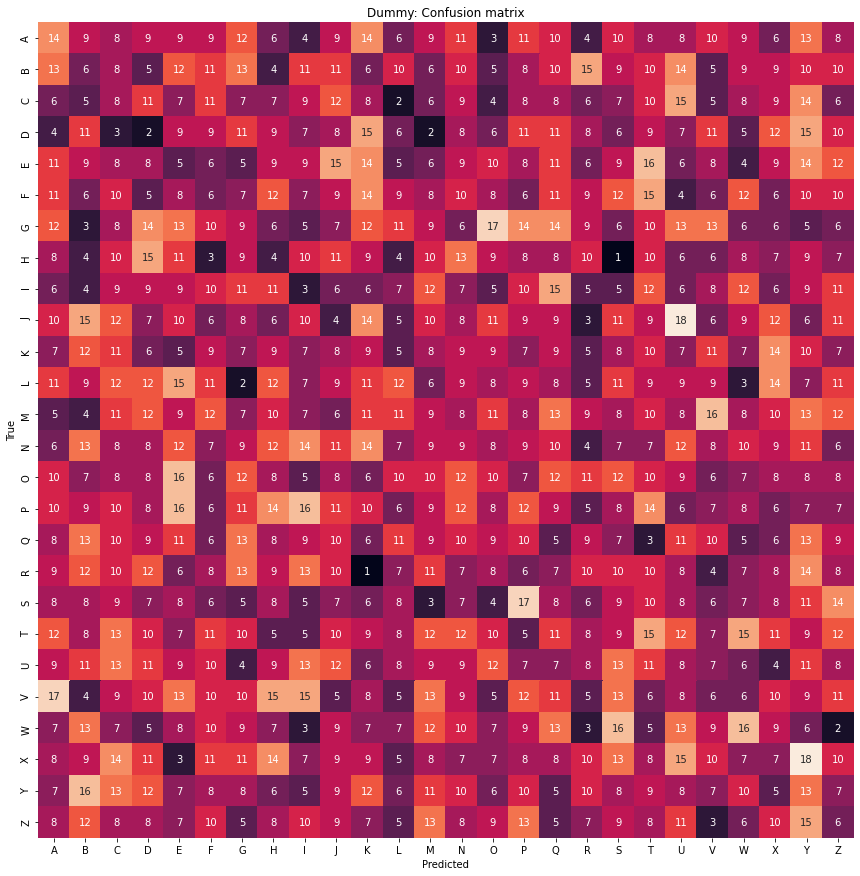

Micro:
  Precision: 0.036166666666666666
  Recall: 0.036166666666666666
  f1-micro: 0.036166666666666666
Macro:
  Precision: 0.03646902508297931
  Recall: 0.03603228371915568
  f1-macro: 0.036121154505749646
----------------------------------------------------------------------------
Gaussian Naive Bayes Classifier:
Confusion Matrix:



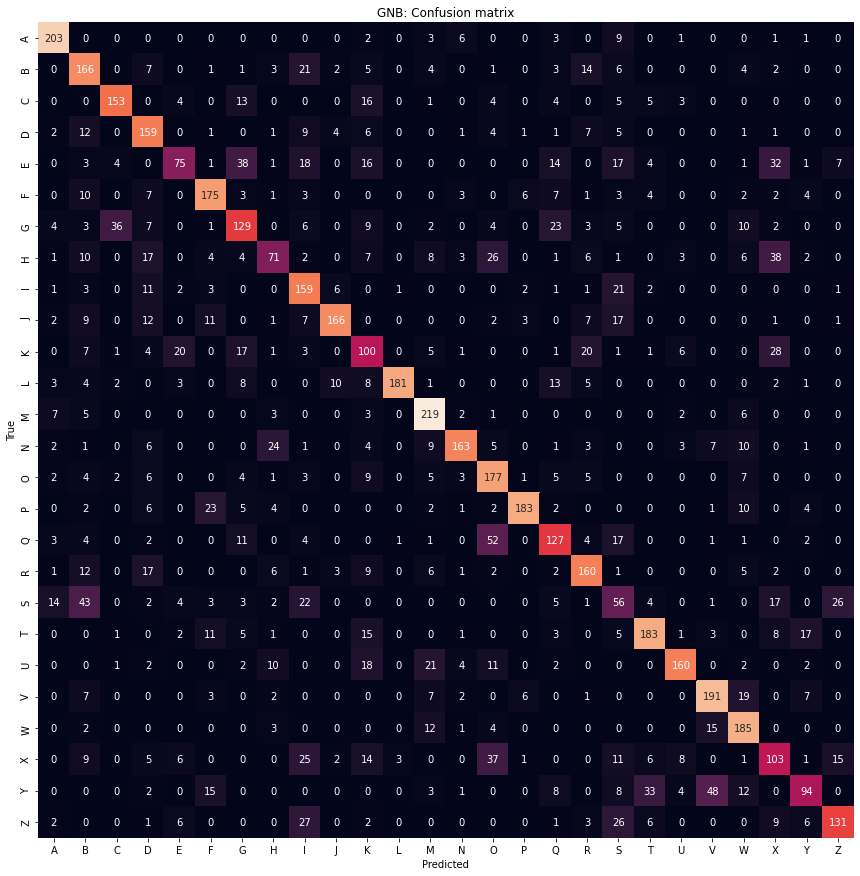

Micro:
  Precision: 0.6448333333333334
  Recall: 0.6448333333333334
  f1-micro: 0.6448333333333334
Macro:
  Precision: 0.6551135125716142
  Recall: 0.6415830088959039
  f1-macro: 0.6392831547331539
----------------------------------------------------------------------------
kNN Classifier:
Confusion Matrix:



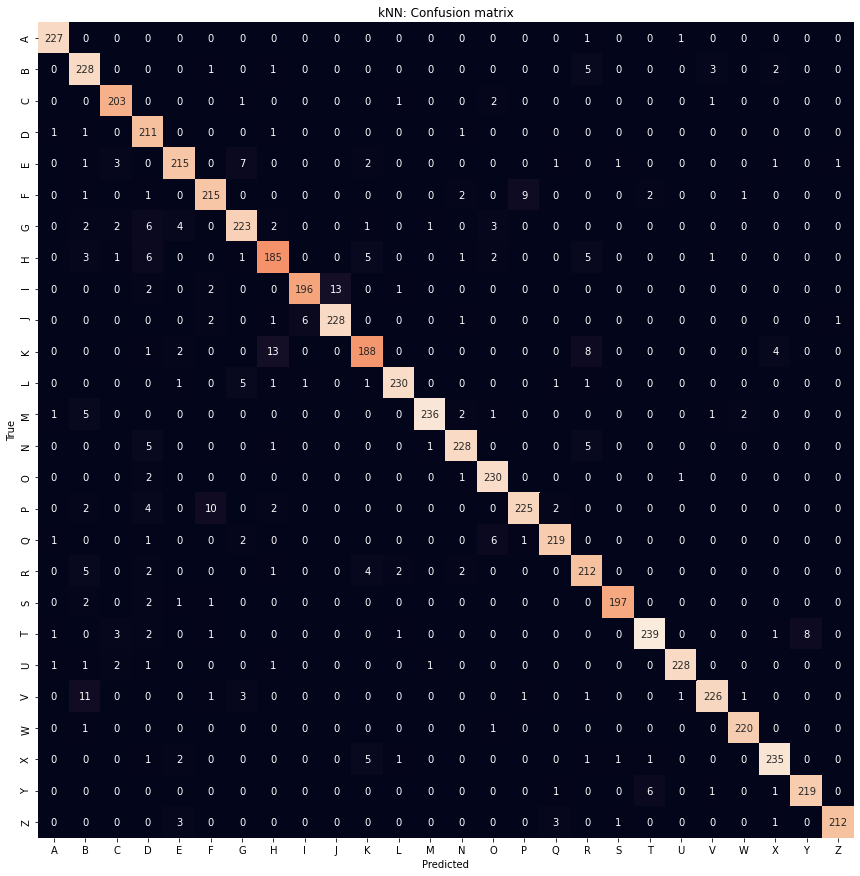

Micro:
  Precision: 0.9458333333333333
  Recall: 0.9458333333333333
  f1-micro: 0.9458333333333333
Macro:
  Precision: 0.9465837023395884
  Recall: 0.9459120895649066
  f1-macro: 0.9458309246797594
----------------------------------------------------------------------------
Multi Layer Perceptron Classifier:
Confusion Matrix:



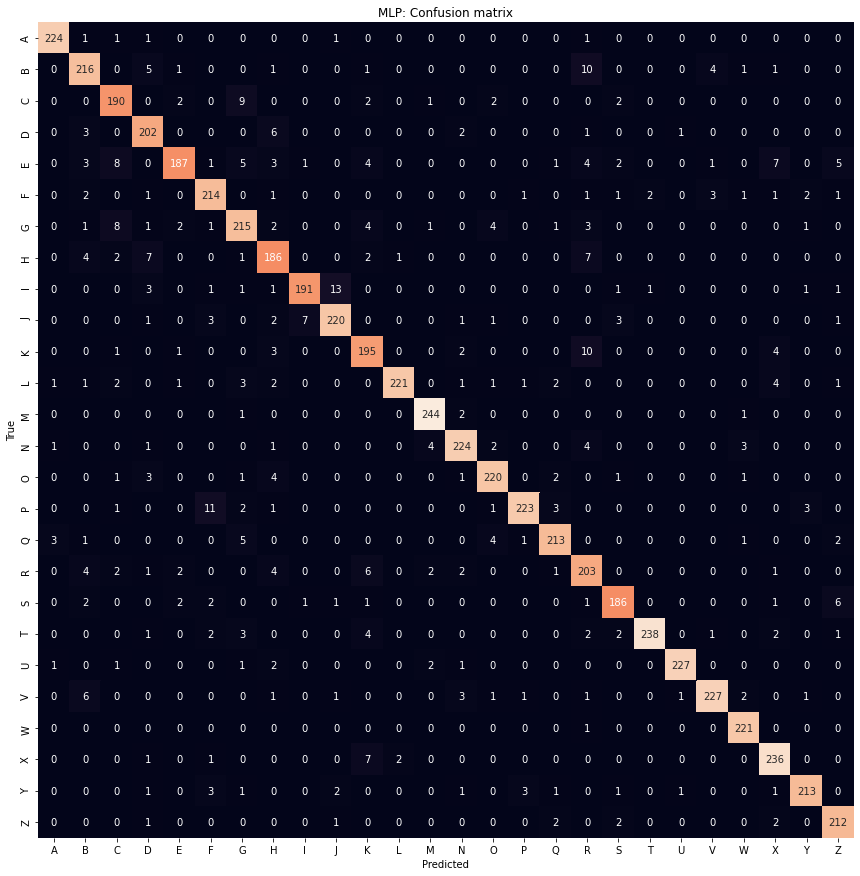

Micro:
  Precision: 0.9246666666666666
  Recall: 0.9246666666666666
  f1-micro: 0.9246666666666666
Macro:
  Precision: 0.9252049200058732
  Recall: 0.9244053125050743
  f1-macro: 0.9241746233379978
----------------------------------------------------------------------------
Linear Support Vector Machine:
Confusion Matrix:


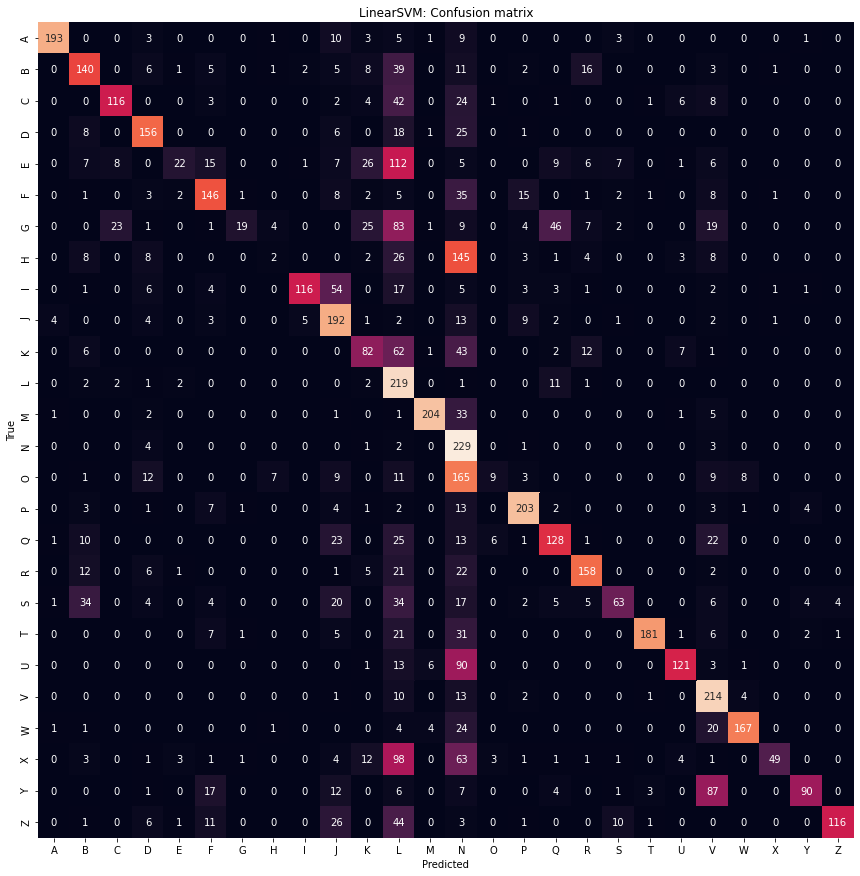

Micro:
  Precision: 0.5558333333333333
  Recall: 0.5558333333333333
  f1-micro: 0.5558333333333333
Macro:
  Precision: 0.6883948563552047
  Recall: 0.5511180499625804
  f1-macro: 0.5464696152300634
----------------------------------------------------------------------------
Polynomial Support Vector Machine:
Confusion Matrix:


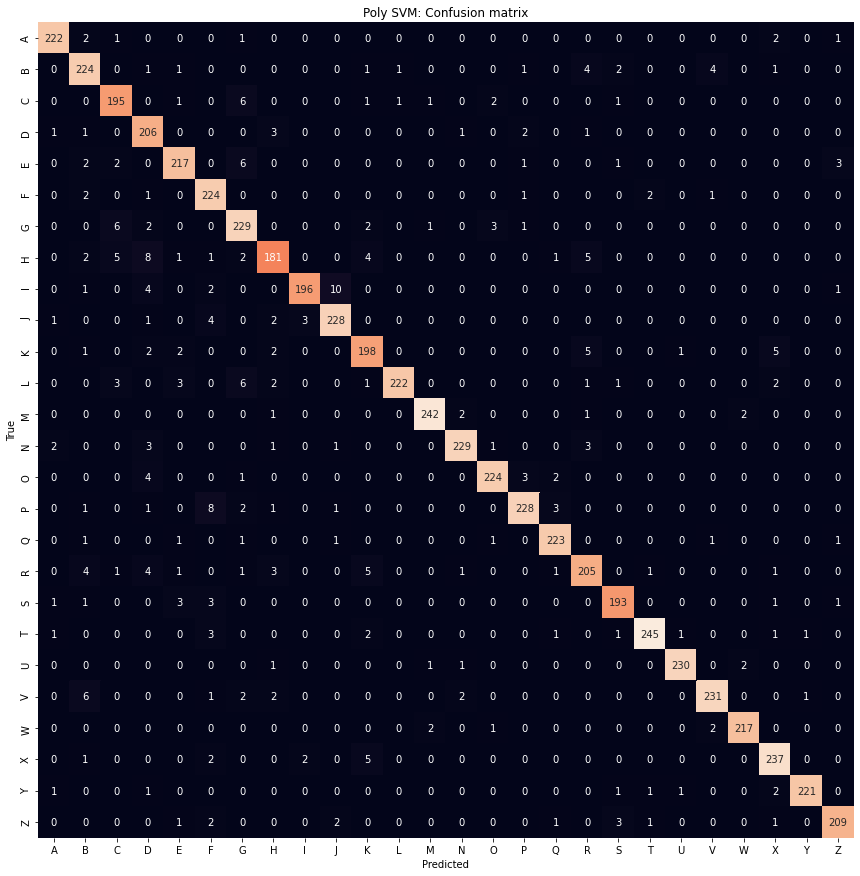

Micro:
  Precision: 0.946
  Recall: 0.946
  f1-micro: 0.946
Macro:
  Precision: 0.9463949878891331
  Recall: 0.9455287123688056
  f1-macro: 0.9456205382870455
----------------------------------------------------------------------------
Radial Base Function Support Vector Machine:
Confusion Matrix:


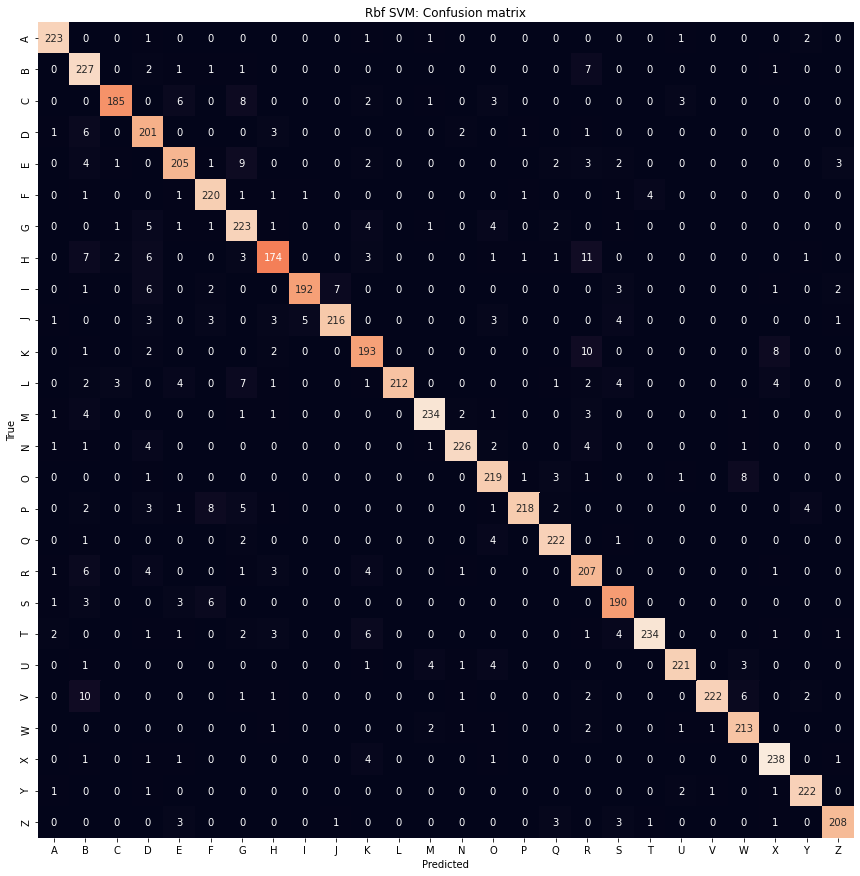

Micro:
  Precision: 0.9241666666666667
  Recall: 0.9241666666666667
  f1-micro: 0.9241666666666667
Macro:
  Precision: 0.9265693594678021
  Recall: 0.9238210712196172
  f1-macro: 0.9240880462870709
----------------------------------------------------------------------------


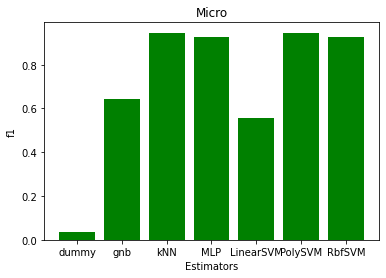

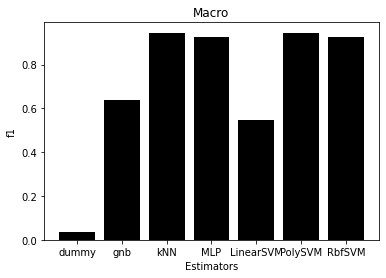

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC 
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt

dc = DummyClassifier() # strategy: default="stratified"
gnb = GaussianNB() # default parameters
knn = KNeighborsClassifier() # n_neighbors: default=5
mlp = MLPClassifier()
l_svm = LinearSVC()
poly_svm = SVC(kernel='poly')
rbf_svm = SVC(kernel='rbf')

dc_model = dc.fit(X2_train, y2_train)
gnb_model = gnb.fit(X2_train, y2_train)
knn_model = knn.fit(X2_train, y2_train)
mlp_model = mlp.fit(X2_train, y2_train)
l_svm_model = l_svm.fit(X2_train, y2_train)
poly_svm_model = poly_svm.fit(X2_train, y2_train)
rbf_svm_model = rbf_svm.fit(X2_train, y2_train)

dc_preds = dc.predict(X2_test)
gnb_preds = gnb.predict(X2_test)
knn_preds = knn.predict(X2_test)
mlp_preds = mlp.predict(X2_test)
l_svm_preds = l_svm.predict(X2_test)
poly_svm_preds = poly_svm.predict(X2_test)
rbf_svm_preds = rbf_svm.predict(X2_test)

print("Dummy Classifier:")
print("Confusion Matrix:")
conf_matrix(dc_preds, y2_test, "Dummy: ", np.unique(label2), 2)
dc_cr = precision_recall_fscore_support(y2_test, dc_preds, average='micro')
print("Micro:")
print("  Precision:", dc_cr[0])
print("  Recall:", dc_cr[1])
print("  f1-micro:", dc_cr[2])
dc_cr2 = precision_recall_fscore_support(y2_test, dc_preds, average='macro')
print("Macro:")
print("  Precision:", dc_cr2[0])
print("  Recall:", dc_cr2[1])
print("  f1-macro:", dc_cr2[2])
print("----------------------------------------------------------------------------")

print("Gaussian Naive Bayes Classifier:")
print("Confusion Matrix:\n")
conf_matrix(gnb_preds, y2_test, "GNB: ", np.unique(label2), 2)
gnb_cr = precision_recall_fscore_support(y2_test, gnb_preds, average='micro')
print("Micro:")
print("  Precision:", gnb_cr[0])
print("  Recall:", gnb_cr[1])
print("  f1-micro:", gnb_cr[2])
gnb_cr2 = precision_recall_fscore_support(y2_test, gnb_preds, average='macro')
print("Macro:")
print("  Precision:", gnb_cr2[0])
print("  Recall:", gnb_cr2[1])
print("  f1-macro:", gnb_cr2[2])
print("----------------------------------------------------------------------------")

print("kNN Classifier:")
print("Confusion Matrix:\n")
conf_matrix(knn_preds, y2_test, "kNN: ", np.unique(label2), 2)
knn_cr = precision_recall_fscore_support(y2_test, knn_preds, average='micro')
print("Micro:")
print("  Precision:", knn_cr[0])
print("  Recall:", knn_cr[1])
print("  f1-micro:", knn_cr[2])
knn_cr2 = precision_recall_fscore_support(y2_test, knn_preds, average='macro')
print("Macro:")
print("  Precision:", knn_cr2[0])
print("  Recall:", knn_cr2[1])
print("  f1-macro:", knn_cr2[2])
print("----------------------------------------------------------------------------")

print("Multi Layer Perceptron Classifier:")
print("Confusion Matrix:\n")
conf_matrix(mlp_preds, y2_test, "MLP: ", np.unique(label2), 2)
mlp_cr = precision_recall_fscore_support(y2_test, mlp_preds, average='micro')
print("Micro:")
print("  Precision:", mlp_cr[0])
print("  Recall:", mlp_cr[1])
print("  f1-micro:", mlp_cr[2])
mlp_cr2 = precision_recall_fscore_support(y2_test, mlp_preds, average='macro')
print("Macro:")
print("  Precision:", mlp_cr2[0])
print("  Recall:", mlp_cr2[1])
print("  f1-macro:", mlp_cr2[2])
print("----------------------------------------------------------------------------")

print("Linear Support Vector Machine:")
print("Confusion Matrix:")
conf_matrix(l_svm_preds, y2_test, "LinearSVM: ", np.unique(label2), 2)
l_svm_cr = precision_recall_fscore_support(y2_test, l_svm_preds, average='micro')
print("Micro:")
print("  Precision:", l_svm_cr[0])
print("  Recall:", l_svm_cr[1])
print("  f1-micro:", l_svm_cr[2])
l_svm_cr2 = precision_recall_fscore_support(y2_test, l_svm_preds, average='macro')
print("Macro:")
print("  Precision:", l_svm_cr2[0])
print("  Recall:", l_svm_cr2[1])
print("  f1-macro:", l_svm_cr2[2])
print("----------------------------------------------------------------------------")

print("Polynomial Support Vector Machine:")
print("Confusion Matrix:")
conf_matrix(poly_svm_preds, y2_test, "Poly SVM: ", np.unique(label2), 2)
poly_svm_cr = precision_recall_fscore_support(y2_test, poly_svm_preds, average='micro')
print("Micro:")
print("  Precision:", poly_svm_cr[0])
print("  Recall:", poly_svm_cr[1])
print("  f1-micro:", poly_svm_cr[2])
poly_svm_cr2 = precision_recall_fscore_support(y2_test, poly_svm_preds, average='macro')
print("Macro:")
print("  Precision:", poly_svm_cr2[0])
print("  Recall:", poly_svm_cr2[1])
print("  f1-macro:", poly_svm_cr2[2])
print("----------------------------------------------------------------------------")

print("Radial Base Function Support Vector Machine:")
print("Confusion Matrix:")
conf_matrix(rbf_svm_preds, y2_test, "Rbf SVM: ", np.unique(label2), 2)
rbf_svm_cr = precision_recall_fscore_support(y2_test, rbf_svm_preds, average='micro')
print("Micro:")
print("  Precision:", rbf_svm_cr[0])
print("  Recall:", rbf_svm_cr[1])
print("  f1-micro:", rbf_svm_cr[2])
rbf_svm_cr2 = precision_recall_fscore_support(y2_test, rbf_svm_preds, average='macro')
print("Macro:")
print("  Precision:", rbf_svm_cr2[0])
print("  Recall:", rbf_svm_cr2[1])
print("  f1-macro:", rbf_svm_cr2[2])
print("----------------------------------------------------------------------------")

plt.bar(["dummy", "gnb", "kNN", "MLP", "LinearSVM", "PolySVM", "RbfSVM"], [dc_cr[2], gnb_cr[2], knn_cr[2], mlp_cr[2], l_svm_cr[2], poly_svm_cr[2], rbf_svm_cr[2]], color="green")
plt.title("Micro")
plt.xlabel("Estimators")
plt.ylabel("f1")
plt.show()

plt.bar(["dummy", "gnb", "kNN", "MLP", "LinearSVM", "PolySVM", "RbfSVM"], [dc_cr2[2], gnb_cr2[2], knn_cr2[2], mlp_cr2[2], l_svm_cr2[2], poly_svm_cr2[2], rbf_svm_cr2[2]], color="black")
plt.title("Macro")
plt.xlabel("Estimators")
plt.ylabel("f1")
plt.show()

#### Βελτιστοποίηση Ταξινομητών

Όπως και για το προηγούμενο dataset, θα αναζητήσουμε τη βέλτιστη αρχιτεκτονική για κάθε ταξινομητή. Θα ξεκινήσουμε κάθε φορά από τον απλό ταξινομητή και θα συνεχίσουμε προσθέτοντας μετασχηματιστές στην είσοδό του, μέχρι να βρούμε την καλύτερη αρχιτεκτονική (bottom-up approach).


##### <u> Dummy Classifier </u>

Όπως αναφέραμε και στο μικρό dataset, ο Dummy Classifier δε μαθαίνει και για το λόγο αυτό, οποιαδήποτε περαιτέρω επεξεργασία των δεδομένων μετά το χωρισμό του dataset σε train/test set είναι άσκοπη. Επομένως, θεωρούμε ότι δε βελτιστοποιείται και θα χρησιμοποιήσουμε στη συνέχεια- για την ενότητα Βέλτιστη αρχιτεκτονική-  ένα pipeline που αποτελείται μόνο από τον ταξινομητή, όπως τον είδαμε και στο Baseline classification.

##### <u> GNB Classifier </u>

Θα μελετήσουμε, ακολούθως, την περίπτωση του Gaussian Naive Bayes Classifier. Σε αντίθεση με τον προηγούμενο ταξινομητή, ο GNB, έχει πολλά περιθώρια βελτιστοποίησης. Δοκιμάζουμε, αρχικά, pipeline που αποτελείται μόνο από τον ταξινομητή και, έπειτα δοκιμάζουμε κάθε μετασχηματιστή μόνο του μπροστά του, προκειμένου να έχουμε μια εικόνα για την επίδραση κάθε μεμονωμένου μετασχηματιστή στο dataset. Παρατηρούμε χαρακτηριστικά ότι ο PCA είναι ο μοναδικός για τον οποίο σημειώνεται αξιοσημείωτη βελτίωση της απόδοσης, οπότε υποψιαζόμαστε ότι θα πρέπει να συμπεριληφθεί στο τελικό σχήμα και επικεντρωνόμαστε στη βελτιστοποίησή του. Ξεκινάμε από ένα ευρύ φάσμα αναζήτησης, όπως κάναμε και για το μικρό dataset (10, 20, ... , 80). Βλέπουμε ότι επιλέγεται το 20 και γι' αυτό επαναλαμβάνουμε την αναζήτηση θέτοντας ως χώρο αναζήτησης τις τιμές [15, 18, 20, 22, 25]. Από την τελευταία αναζήτηση προκρίνεται ως βέλτιστη τιμή το 15, οπότε χτίζουμε γύρω του το χώρο αναζήτησης που διατηρήσαμε για το σύνολο των πειραμάτων στη συνέχεια [13, 14, 15, 16, 17, 18]. Ο αριθμός συνιστωσών που προέκυψε για τα περισσότερα εξ' αυτών ήταν 16 (ενίοτε 15).  

Έχοντας εντοπίσει τον βέλτιστο αριθμό συνιστωσών για το συγκεκριμένο dataset συνεχίσαμε δοκιμάζοντας σχεδόν όλους τους συνδυασμούς. Παρατηρήσαμε ότι ο selector δεν επηρεάζει την απόδοση του προβλεπτή, αφού ακόμα κι όταν περιλαμβάνεται στο Pipeline, βέλτιστο κατώφλι είναι το 0. Από την άλλη, βλέπουμε ότι ο Standard scaler, παρόλο που από μόνος του μοιάζει να μην επηρεάζει το αποτέλεσμα, αν συνδυαστεί με τον PCA, βελτιώνει σημαντικά την ακρίβεια της πρόβλεψης. Δοκιμάσαμε, δε, την αντικατάσταση του Standard με MinMax scaler, αλλαγή που επέφερε μικρή πτώση της απόδοσης και, ως εκ τούτου, απορρίφθηκε. Το ίδιο συνέβη και με την προσθήκη του Sampler στην προηγούμενη αρχιτεκτονική, γεγονός αναμενόμενο, αφού το dataset είναι ήδη ισορροπημένο.

<br>

| #Arch 	| Selector 	| Scaler 	| Sampler 	| PCA 	| F1_micro 	| F1_macro 	|
|:------:	|:--------:	|:------:	|:-------:	|:---:	|:--------:	|:--------:	|
|    1   	|          	|        	|         	|     	|   0.644  	|   0.641  	|
|    2   	|     X    	|        	|         	|     	|   0.644  	|   0.641  	|
|    3   	|          	|    X   	|         	|     	|   0.644  	|   0.641  	|
|    4   	|          	|        	|    X    	|     	|   0.645  	|   0.642  	|
|    5   	|          	|        	|         	|  X  	|   0.678  	|   0.68  	|
|    6   	|     X    	|    X  	|         	|     	|   0.644  	|   0.641  	|
|    7   	|     X    	|        	|    X    	|     	|   0.642  	|   0.639  	|
|    8   	|          	|    X   	|    X    	|     	|   0.643  	|   0.639  	|
|    9   	|          	|        	|    X    	|  X  	|   0.675  	|   0.677  	|
|   10   	|          	|    X   	|         	|  X  	|   0.686  	|   0.686  	|
|   11   	|     X    	|    X   	|    X    	|     	|   0.642  	|   0.639  	|
|   12    |           |    X    |    X      |  X    |   0.682   |   0.682   |
|   13   	|     X    	|    X   	|         	|  X  	|   0.621   |   0.617  	|
|   14   	|     X    	|    X   	|    X    	|  X  	|   0.684  	|   0.684  	|

<br>

Όπως γίνεται σαφές από τα προηγούμενα, αλλά και τον παραπάνω πίνακα, η βέλτιστη αρχιτεκτονική για τον Gaussian Naive Bayes είναι αυτή με **Standard Scaler και PCA** για αριθμό συνιστωσών (n_components) ίσο με **16**, μπροστά από τον ταξινομητή.

##### <u> kNN Classifier </u>

Tέλος, θα μελετήσουμε την περίπτωση του kNN Classifier. Όπως και πριν, εξετάζουμε πρώτα την περίπτωση του σκέτου ταξινομητή, το αποτέλεσμα της οποίας θα χρησιμοποιηθεί ως τιμή αναφοράς και, ύστερα, δοκιμάζουμε διαδοχικά τους μετασχηματιστές έναν-έναν κάθε φορά, με σκοπό να παρατηρήσουμε την επίδραση του καθενός. Ωστόσο, αυτή τη φορά έχουμε ήδη μια εικόνα σχετικά με τη συμπεριφορά τους για το συγκεκριμένο dataset, επομένως θα βασιστούμε σε μεγάλο βαθμό στις παρατηρήσεις που κάναμε κατά τη μελέτη του GNB.  
Ειδικότερα, είναι πλέον σαφές ότι λόγω του ότι το dataset είναι ισορροπημένο, ο sampler δεν αναμένεται να διαδραματίσει σημαντικό ρόλο. Το ίδιο περιμένουμε να συμβεί και με τον selector, αφού όπως φάνηκε τα χαρακτηριστικά έχουν έτσι κι αλλιώς πολύ μικρή διακύμανση. Παρόλ' αυτά θα συμπεριλάβουμε στον πίνακα για λόγους πληρότητας και τις μετρήσεις που αφορούν τους προαναφερθέντες μετασχηματιστές. Όσον αφορά, δε, τον PCA θα ξεκινήσουμε από το διάστημα που είχαμε εντοπίσει για τον GNB (13, 14, 15, 16, 17, 18) αναμένοντας μικρή ή και καμία αλλαγή.

<br>

| #Arch | Selector | Scaler | Sampler | PCA | F1_micro | F1_macro |
|:-----:|:--------:|:------:|:-------:|:---:|:--------:|:--------:|
|   1   |          |        |         |     |   0.952  |   0.951  |
|   2   |     X    |        |         |     |   0.952  |   0.951  |
|   3   |          |    X   |         |     |   0.949  |   0.949  |
|   4   |          |        |    X    |     |   0.953  |   0.954  |
|   5   |          |        |         |  X  |   0.955  |   0.954  |
|   6   |     X    |    X   |         |     |   0.954  |   0.953  |
|   7   |     X    |        |    X    |     |   0.956  |   0.956  |
|   8   |          |    X   |    X    |     |   0.952  |   0.954  |
|   9   |          |        |    X    |  X  |   0.956  |   0.958  |
|  10   |          |    Χ   |         |  X  |   0.957  |   0.956  |
|  11   |     X    |    X   |    X    |     |   0.946  |   0.946  |
|  12   |          |    X   |    X    |  X  |   0.949  |   0.948  |
|  13   |     X    |    X   |         |  X  |   0.954  |   0.954  |
|  14   |     X    |    X   |    X    |  X  |   0.95   |   0.947  |

<br>

Όπως προκύπτει από τον παραπάνω πίνακα με τα συγκεντρωτικά αποτελέσματα των καλύτερων πειραμάτων, οι προβλέψεις μας ήταν εν γένει σωστές. Παρατηρούμε δύο πειράματα που περιλαμβάνουν τον sampler και πετυχαίνουν πολύ καλά αποτελέσματα (7 και 9). Αποδίδουμε τη βελτίωση της απόδοσης στην τύχη. Πράγματι, αν εξετάσουμε και το πείραμα 7 που συνδυάζει scaler, sampler, pca θα δούμε ότι ο sampler ρίχνει την ακρίβεια σε σχέση με το 10 από το οποίο απουσιάζει. Αυτό σχετίζεται με την τυχαιότητα με την οποία επιλέγονται τα δείγματα που θα προσμετρηθούν δεύτερη φορά (oversampling) για την εξισσορόπηση του dataset και, εφόσον οι συχνότητες εμφάνισης των κλάσεων χαρακτηρίζονται από πολύ μικρή διακύμανση, όπως είδαμε στην προκαταρκτική μελέτη των δεδομένων, το αποτέλεσμα της προσθήκης του sampler δεν είναι σταθερό. Για το λόγο αυτό, επιλέγεται ως βέλτιστη αρχιτεκτονική, όπως και για τον GNB, αυτή του **Scaler-PCA**.  

Όσον αφορά τον Scaler, προβήκαμε στη συγκριτική μελέτη της απόδοσης του Standard και του **MinMax** πάνω στο σύνολο δεδομένων και βρήκαμε ότι ο δεύτερος υπερτερεί αυτή τη φορά. Σχετικά με τον αριθμό των συνιστωσών από την άλλη, το διάστημα αναζήτησης που επιλέχθηκε εξ αρχής για το PCA αποδείχτηκε σωστό, αφού για τη βέλτιστη αρχιτεκτονική προέκυψε n_components ίσο με **16** για τις μετρικές f1-micro και f1-macro.

###### Υπερπαράμετροι

* **n_neighbors:** *3*  
Όσον αφορά τον αριθμό γειτόνων ξεκινήσαμε την αναζήτηση για τιμές 1, 11, 21, 31 κλπ, αλλά γρήγορα συνειδητοποιήσαμε ότι η βέλτιστη περιοχή είναι μεταξύ των τιμών 1 και 9, οπότε χρησιμοποιήσαμε για το σύνολο των πειραμάτων τις τιμές 1, 3, 5, 7, 9, στη συντριπτική πλειοψηφία των οποίων το αποτέλεσμα ήταν 3 ή 5. Το ίδιο συνέβη και για τη βέλτιστη αρχιτεκτονική, όπου προέκυψε αριθμός γειτόνων ίσος με 3 για f1-micro και για f1-macro.

* **metric:** *'manhattan'*  
Ως προς τις μετρικές, δοκιμάσαμε όλες τις παρεχόμενες για αριθμητικά δεδομένα, τόσο τις "hamming", "canberra", "braycurtis" που προορίζονται για ακέραια χαρακτηριστικά (σαν αυτά που έχουμε στην προκειμένη) όσο και εκείνες που προορίζονται για πραγματικά. Παρατηρήσαμε ότι οι πρώτες 3 είχαν σταθερά χειρότερη απόδοση, οπότε και απορρίφθηκαν. Έτσι, χρησιμοποιήθηκε ως χώρος αναζήτησης ο ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'], από τον οποίο μόνο τα "euclidean", "manhattan", "minkowski" προέκυψαν στα πειράματα, με το δεύτερο να προκρίνεται ως βέλτιστο και για τις δύο μετρικές στην επιλεγμένη αρχιτεκτονική.

* **weights:** *'distance'*  
Εδώ οι δυνατές επιλογές ήταν 2, η default "uniform" και η "distance", με τη δεύτερη να προτιμάται στις περισσότερες περιπτώσεις, συμπεριλαμβανομένης και της βέλτιστης αρχιτεκτονικής.


Στη συνέχεια θα μελετήσουμε τους ταξινομητές Multi-Layer Perceptron (MLP) και Support Vector Machines (SVM). Για την περίπτωση των SVM θα πραγματοποιηθεί ανάλυση για 3 διαφορετικούς τύπους πυρήνων (Linear, Polynomial και Radial Basis Function - RBF).

Λόγω του μεγέθους του dataset χρησιμοποιήσαμε ένα ποσοστό των δειγμάτων του dataset για την εξερεύνηση υπερπαραμέτρων, με σκοπό τη μείωση του απαιτούμενου χρόνου αναζήτησης GridSearchCV. Για να επιτευχθεί αυτό υλοποιήσαμε τον κώδικα που ακολουθεί.
 
```
from sklearn.utils import shuffle
sdata, starget = shuffle(data2, label2, random_state=341976)
samples = 2000
data = sdata[0:samples-1,:]
target = starget[0:samples-1]
from sklearn.model_selection import train_test_split
sample_X_train, sample_X_test, sample_y_train, sample_y_test = train_test_split(data, target, test_size=0.3, random_state=20176)
```

Τα αποτελέσματα της διαδικασίας παρουσιάζονται συνοπτικά στους πίνακες που ακολουθούν, ενώ ταυτόχρονα παραθέτουμε τον τρόπο σκέψης που μας οδήγησε σε αυτά.


##### <u> MLP </u>

Όπως αναφέρθηκε προηγουμένως, για την περίπτωση του Multilayer Perceptron χρησιμοποιήσαμε ένα μικρό ποσοστό του αρχικού dataset. Ωστόσο, είναι σημαντικό να αναφέρουμε πως ακόμα και για μεγέθη 1000 δειγμάτων παρατηρήθηκαν εκτενείς χρόνοι εκτέλεσης, γεγονός που μας οδήγησε στη λήψη μετρήσεων για 500. 

Εξετάζουμε πρώτα την περίπτωση του σκέτου ταξινομητή, το αποτέλεσμα της οποίας θα χρησιμοποιηθεί ως τιμή αναφοράς και, ύστερα, δοκιμάζουμε διαδοχικά τους μετασχηματιστές έναν-έναν κάθε φορά, με σκοπό να παρατηρήσουμε την επίδραση του καθενός. Τα αποτελέσματα που εμφανίστηκαν, από τα πρώτα κιόλας βήματα της διαδικασίας, παρουσίασαν έντονες διακυμάνσεις τόσο στην επιλογή τιμών των υπερπαραμέτρων όσο και στις μετρικές f1-score. Ακολουθώντας την επαναληπτική αναζήτηση που εφαρμόστηκε και στους υπόλοιπους αλγορίθμους, οδηγηθήκαμε σε διαδοχικές χρονοβόρες εκτελέσεις οι οποίες δεν έδιναν ξεκάθαρη εικόνα για την επίδοση του μοντέλου.

Ως εκ τούτου, βασιζόμενοι στα αντίστοιχα αποτελέσματα των υπόλοιπων αλγορίθμων, για το συγκεκριμένο dataset, επικεντρώσαμε την αναζήτηση μας στις αρχιτεκτονικές scaler-pca-mlp και scaler-sampler-pca-mlp, οι οποίες φάνηκε εξ αρχής να βελτιώνουν την επίδοση συγκριτικά με την baseline classification. Για να το επιβεβαιώσουμε περιορίσαμε τις υπερπαραμέτρους εισόδου στο gridsearch, διατηρώντας όσες είχαν προκριθεί ως βέλτιστες σε κάποια δοκιμή και απορρίπτοντας τις υπόλοιπες, και το εφαρμόσαμε στο πλήρες dataset. Προέκυψε, τελικά, ως βέλτιστη αρχιτεκτονική η MinMaxScaler - RandomOverSampler - PCA - MLP, ενώ ο αριθμός των συνιστωσών που προέκυψαν για το PCA, ήταν όπως και για άλλους προβλεπτές 16.

###### Υπερπαράμετροι

* **activation:** *tanh*  
Για την συνάρτηση ενεργοποίησης στο hidden layer πραγματοποιήσαμε αναζήτηση με πεδίο ορισμού όλες τις τιμές ['identity', 'logistic', 'tanh', 'relu']. Από αυτές παρατηρήσαμε πως στις περισσότερες περιτπώσεις ως βέλτιστες επιλέχθηκαν οι tanh και relu σε αντίθεση με τις identity και logistic οι οποίες δεν εμφανίστηκαν καμία φορά. Λόγω αυτού, στις αναζήτησεις για το πλήρες dataset χρησιμοποιήσαμε τις tanh, relu, εκ των οποίων καλύτερη αποδεικνύεται η tanh.

* **solver:** *adam*  
Από το σύνολο των διαθέσιμων τιμών που αναφέρεται στο documentation του sklearn  ['lbfgs', 'sgd', 'adam'] και δοκιμάστηκαν, αποδοτικότερος φάνηκε να είναι default solver adam. Όπως αναφέρεται και στο κείμενο, λειτουργεί καλύτερα για μεγάλα datasets τόσο σε χρόνους εκπαίδευσης όσο και σε validation scores σε αντίθεση με το lbfgs το οποίο ενδείκνυται για μικρότερα. Έτσι, χρησιμοποιήσαμε μόνο την τιμή adam στην τελική εφαρμογή για το πλήρες dataset.

* **lrate:** *invscaling*  
Το εύρος αναζήτησης που χρησιμοποιήθηκε για το learning rate είναι ['constant', 'invscaling', 'adaptive']. Από αυτές παράτηρήσαμε πως η επιλογή adaptive δεν εμφανίστηκε σε καμία από τις αναζητήσεις που πραγματοποιήθηκαν. Για την τελική εφαρμογή του gridsearch σε όλο το dataset επιλέχθηκαν οι default constant και invscaling με την δεύτερη να επικρατεί.

* **alpha:** *1e-04*, *1e-05*   
Η αναζήτηση ξεκίνησε από εύρος τιμών γύρω από την τιμή 1e-4, [1e-07, 1e-06, 1e-05, 1e-04, 1e-03]. Για τις περιπτώσεις των μικρών ποσοστών το αποτελέσμα φάνηκε να σταθεροποιείται στη τιμή 1e-06. Χρησιμοποιώντας μικρότερο πεδίο ορισμού στην τελική αναζήτηση παρατηρήσαμε ότι ώς βέλτιστη τιμή επιλέχθηκε η default 1e-04 για το micro average, και η 1e-05 για το macro.

* **max_iter** *1200*  
Στη περίπτωση της υπερπαραμέτρου του αριθμού επαναλήψεων ξεκινήσαμε ελέγχοντας τιμές κοντά στην προκαθορισμένη τιμή 200 με μικρά βήματα [100, 150, 250, 300, 350, 400, 500, 600, 700]. Ωστόσο, γρήγορα έγινε κατανοητό πως επιλεγόταν συνεχώς ως βέλτιστη η μεγαλύτερη διαθέσιμη τιμή. Το γεγονός αυτό μας οδήγησε σε αύξηση του βήματος αναζήτησης με πεδίο τιμών [100, 1000, 10000]. Η τιμή άρχισε να κυμαίνεται στα επίπεδα του 1000, δίχως να ξεπερνά το 1500. Στις αντίστοιχες δοκιμές για πλήρες dataset η τιμή σταθεροποιήθηκε στα 1200.

* **hidden** *(200,)*  
Τέλος, σχετικά με την υπερπαράμετρο hidden layer sizes παρατηρήσαμε πολύ μεγάλη διακύμανση ως προς την επιλογή της βέλτιστης τιμής. Στις αναζητήσεις που πραγματοποιήσαμε για το πλήρες dataset, ωστόσο, βρήκαμε την τιμή (200,) ως την καλύτερη σε διάστημα αναζήτησης [(150,), (180,), (200,), (220,), (250,)].




##### <u> Linear SVM </u>

Για την περίπτωση γραμμικού πυρήνα Support Vector Machine χρησιμοποιούμε την LinearSVC και ξεκινάμε προσδιορίζοντας την επίδοση του σκέτου ταξινομητή. Στη συνέχεια προσδιορίζουμε ξεχωριστά το συνδυασμό με κάθε μετασχηματιστή με τα αποτελέσματα να εμφανίζονται στις εγγραφές 2-5 του πίνακα.

Παρατηρούμε πως η χρήση του selector έχει αρνητική επίδραση στις επιδόσεις της αρχιτεκτονικής, ενώ σημαντική αύξηση της μετρικής επιφέρουν οι scaler και pca. Επιπλέον, προσθέτοντας τους υπόλοιπους μετασχηματιστές στην αρχιτεκτονική του selector (Arch 6-9) όχι μόνο δεν εμφανίζεται βελτίωση των αποτελεσμάτων, αλλά ταυτόχρονα η υπερπαράμετρος threshold παραμένει σε όλες τις αναζητήσεις 0.

Με βάση τα παραπάνω είναι απαραίτητο να πραγματοποιηθεί έλεγχος των συνδυασμών scaler, sampler και pca αλλά και βελτιστοποίηση των υπερπαραμέτρων του τελευταίου. Ξεκινώντας από ευρύ φάσμα τιμών n_components = [10, 20, 30, 40] οι εκτελέσεις καταλήγουν στην σταθεροποίηση της βέλτιστης στο 16. Συνδυάζοντας, λοιπόν, τους προαναφερθέντες μετασχηματιστές καταλήγουμε ότι η βέλτιστη αρχιτεκτονική αποτελείται από τους scaler, sampler, pca και linear svm.

Παρατηρούμε πως οι αρχιτεκτονικές scaler, sampler, pca, linear svm και scaler, pca, linear svm (Arch 10-11) παρουσιάζουν παρόμοιες τιμές επίδοσης. Τα αποτελέσματα οφείλονται στην τυχαιότητα με την οποία ο Oversampler επιλέγει τα δείγματα που θα χρησιμοποιήσει για την εξισσορόπηση του dataset. Επιπλέον, επηρεάζονται σημαντικά και από το γεγονός ότι για το dataset οι συχνότητες εμφάνισης κάθε κλάσης εμφανίζουν αποδεκτές διακυμάνσεις μεταξύ τους.

<br>

| #Arch | Selector | Scaler | Sampler | PCA | F1_micro | F1_macro |
|:-----:|:--------:|:------:|:-------:|:---:|:--------:|:--------:|
|   1   |          |        |         |     |   0.645  |   0.626  |
|   2   |     X    |        |         |     |   0.642  |   0.622  |
|   3   |          |    Χ   |         |     |   0.682  |   0.661  |
|   4   |          |        |    Χ    |     |   0.664  |   0.642  |
|   5   |          |        |         |  X  |   0.683  |   0.668  |
|   6   |     X    |    X   |         |     |   0.642  |   0.612  |
|   7   |     X    |    X   |    X    |     |   0.641  |   0.621  |
|   8   |     X    |    X   |         |  X  |   0.648  |   0.626  |
|   9   |     X    |    X   |    X    |  X  |   0.655  |   0.635  |
|   10  |          |    X   |         |  X  |   0.685  |   0.668  |
|   11  |          |    Χ   |     Χ   |  Χ  |   0.688  |   0.668  |

<br>

Για την βέλτιστη αρχιτεκτονική που προκύπτει από την προηγούμενη ανάλυση επαναλαμβάνουμε την αναζήτηση χρησιμοποιώντας το σύνολο των εγγραφών του dataset και χρησιμοποιώντας διευρυμένες περιοχές τιμών για τις υπερπαραμέτρους που ελέγχονται. Οι τιμές που επιλέγονται παρουσιάζονται στη συνέχεια.


###### Υπερπαράμετροι

* **loss:** *squared_hinge*  
Σχετικά με τη συνάρτηση σφάλματος (loss function) χρησιμοποιήσαμε τις τιμές hinge και squared_hinge, όπως αυτές αναφέρονται στο documentation του LinearSVC. Σε όλες τις αναζητήσεις που εκτελέστηκαν βέλτιστη τιμή loss προσδιορίστηκε η default squared_hinge.

* **C:** *10.0*   
Για τον έλεγχο της σκληρότητας του περιθωρίου επιλέξαμε ως υποψήφιες τιμές τις [1.0, 5.0, 10.0]. Ωστόσο, γρήγορα καταλάβαμε πως συγκεκριμένα pipelines χαρακτηρίζονται από καλύτερη επίδοση όταν ο ταξινομητής επιτρέπει σε μερικά δείγματα να περάσουν στο περιθώριο. Κατά την εκτέλεση των αρχιτεκτονικών σε μικρό ποσοστό του dataset παρατηρήσαμε την σκληρότητα C να λαμβάνει τιμές που προσέγγιζαν το 0.08 - 0.9 και τελικά να σταθεροποιείται στο διάστημα 0.6-0.7. Στις επαναλήψεις με είσοδο το σύνολο του dataset, χρησιμοποιήσαμε για λόγους πληρότητας και πάλι διευρυμένο πεδίο τιμών σκληρότητας [0.1, 1.0, 5.0, 10.0, 20.0] και παρατηρήσαμε ότι ως βέλτιστη τιμή επιλέχθηκε η 10.0.

* **tol:** *1e-29, 1e-27*  
Για τον προσδιορισμό της βέλτιστης τιμής tolerance ξεκινήσαμε την αναζήτηση μας από περιοχές κοντά στην προκαθορισμένη τιμή 1e-4. Στην διαδικασία για προσδιορισμό βέλτιστης αρχιτεκτονικής παρατηρήσαμε ότι το grid search σε κάθε περίπτωση αναδείκνυε ως βέλτιστη την μικρότερη δυνατή. Συνεχίζοντας την διεύρυνση τους εύρους αναζήτησης μας σε ακόμα μικρότερες τιμές παρατηρήσαμε ότι ακόμα και για τάξεις μεγέθους 1e-29 η βέλτιστη επιλογή ήταν και πάλι η ελάχιστη δυνατή. Ίδια διαδικασία ακολουθήσαμε και στην περίπτωση του συνολικού dataset.

* **multi_class:** *ovr*  
Σχετικά με την στρατηγική που ακολουθείται για multiclass dataset, σύμφωνα με το documentation, διατίθενται οι τιμές ovr και crammer_singer. Από τις 2 αυτές στρατηγικές η πρώτη αποτελεί προεπιλογή, ενώ αναφέρεται ότι η crammer_singer αν και χαρακτρηρίζεται από μεγάλο υπολογιστικό κόστος, πολύ σπάνια επιτυγχάνει καλύτερη επίδοση από την ovr. Οι παραπάνω παρατηρήσεις οδηγούν σε απόρριψη της τιμής crammer_singer από τη βέλτιστη για την υπερπαράμετρο multi_class.

##### <u> Polynomial SVM </u>

Για την περίπτωση του Polynomial kernel Service Vector Machine χρησιμοποιούμε SVC με kernel='poly'. Αρχικά υπολογίζουμε την επίδοση του ταξινομητή χωρίς την εφαρμογή μετασχηματιστών στο pipeline. Στη συνέχεια, στις γραμμές 2-5 εμφανίζονται οι επιδόσεις του ταξινομητή μετά την εφαρμογή κάθε μετασχηματιστή ξεχωριστά.

Παρατηρείται πως κανένας από τους μετασχηματιστές δεν βελτιώνει τις επιδόσεις της ταξινόμησης όταν χρησιμοποιείται μόνος του. Επιπλέον, και συγκεκριμένα στην περίπτωση του selector, παρατηρείται ότι παρόλο που αρχικά φαίνεται οι επιδόσεις του να είναι οι πιο κοντινές στις αρχικές, η υπερπαράμετρος του, threshold, κινείται σε τιμές στην περιοχή του μηδενός σε όλες τις περιπτώσεις που εφαρμόστηκε, χωρίς ταυτόχρονα να επιτυγχάνεται οποιαδήποτε βελτίωση στα αποτελέσματα των προβλέψεων.

Επομένως, οδηγούμαστε σε αναλυτικότερη διερεύνηση μεταξύ των μετασχηματιστών scaler, sampler και pca. Με βάση τα αποτελέσματα του πίνακα των μετρήσεων, ο συνδυασμός που επιφέρει τα καλύτερα αποτελέσματα και στα δύο f-scores είναι ο Scaler/Sampler ο οποίος δεν απαιτεί την βελτιστοποίηση κάποιας επιπλέον υπερπαραμέτρου.

Επομένως, μένει να προσδιορίσουμε τις βέλτιστες τιμές για τις υπερπαραμέτρους C, degree, gamma και tol, του Polynomial Kernel.

| #Arch | Selector | Scaler | Sampler | PCA | F1_micro | F1_macro |
|:-----:|:--------:|:------:|:-------:|:---:|:--------:|:--------:|
|   1   |          |        |         |     |   0.821  |   0.819  |
|   2   |          |    X   |         |     |   0.789  |   0.789  |
|   3   |          |        |    X    |     |   0.818  |   0.818  |
|   4   |     X    |        |         |     |   0.809  |   0.809  |
|   5   |          |        |         |  X  |   0.795  |   0.796  |
|   6   |          |    X   |         |  X  |   0.785  |   0.786  |
|   7   |          |        |    X    |  X  |   0.811  |   0.815  |
|   8   |          |    X   |    X    |     |   0.826  |   0.819  |
|   9   |          |    X   |    X    |  X  |   0.776  |   0.784  |


###### Υπερπαράμετροι

* **C:** *45*  
Για τον παράγοντα κανονικοποίησης επιλέξαμε αρχικά τις τιμές [1, 5, 10, 15]. Εφαρμόζοντας αυτές τις τιμές σε ένα μικρό ποσοστό του συνολικού dataset τις είδαμε να σταθεροποιούνται στο 10.8. Επομένως ο αλγόριθμος καλείται να δώσει κάποια σημασία σε ενδεχόμενες ακραίες τιμές στις επερχόμενες προβλέψεις του. Αυτό το φαινόμενο παρουσιάστηκε σε ακόμη μεγαλύτερο βαθμο όταν χρησιμοποιήσαμε το σύνολο του dataset, αφού η τελική τιμή της παραμέτρου **C** σταθεροποιήθηκε στο 45.

* **degree:** *3*  
Αρχικοποιήσαμε τον πολυωνυμικό βαθμό του πυρήνα με τις τιμές [2, 3, 4, 5]. Αποφύγαμε την τιμή 1 καθώς αυτό θα μας οδηγούσε σε ταύτιση με τον Linear SVM ο οποιός εξετάστηκε ξεχωριστά προηγουμένως. Κατά τη χρήση του μειωμένου dataset η βέλτιστη τιμή του **degree** είναι 2. Έπειτα όμως από χρήση ολόκληρου του dataset αυτή η τιμή σταθεροποιείται τελικά στο 3.

* **gamma:** *scale*  
Ο συντελεστής **gamma** στη βιβλιοθήκη της sklearn λαμβάνει είτε την τιμή scale είτε την τιμή auto. Στην περίπτωση μας η τιμή scale κρίθηκε από το σύστημα ως βέλτιστη, και στην περίπτωση του περιορισμένου dataset, αλλά και σε αυτή του πλήρους.

* **tol:** *1e-13*  
Για τον προσδιορισμό του tolerance ξεκινήσαμε από την default τιμή 1e-3. Παρατηρήσαμε όμως ότι σε κάθε περίπτωση επιλεγόταν από τον αλγόριθμο η μικρότερη δυνατή τιμή tolerance που του διαθέταμε, χωρίς ταυτόχρονα αυτό να επηρεάζει εμφανώς τα αποτελέσματα. Εν τέλει, φτάσαμε στην τιμή 1e-13 η οποία, αν και ήταν και αυτή η μικρότερη τιμή που δόθηκε στην συγκεκριμένη περίπτωση, κρίθηκε κατάληλλη για τον προσδιορισμό του tolerance, εφόσον περεταίρω διερεύνηση δεν θα προκαλούσε βελτίωση στην απόδοση του αλγορίθμου.

##### <u> Radial Basis Function SVM </u>

Για τον Radial Basis Function Service Vector Machine χρησιμοποιούμε SVC με kernel='rbf'. Αρχικά γίνεται fit και predict χωρίς τη χρήση μετασχηματιστών στο Pipeline, ενώ στις γραμμές 2-5 εξετάζεται η επίδραση κάθε μετασχηματιστή ξεχωριστά.

Όπως φαίνεται, κανένας μετασχηματιστής δεν καταφέρνει να βελτιώσει τα αποτελέσματα μόνος του. Επιπλέον, όπως και σε προηγούμενες περιπτώσεις, η χρήση του selector σε οποιονδήποτε συνδυασμό, εκτός του ότι δεν φέρνει κάποιο αποτέλεσμα, μας δίνει πρακτικά μηδενική βέλτιστη τιμή της υπερπαραμέτρου του κατωφλιού. Έτσι οδηγούμαστε στην αναζήτηση λύσης ανάμεσα στους συνδυασμούς των μετασχηματιστών Sampler, Scaler και PCA. Εξετάζοντας λοιπόν τις περιπτώσεις 8-11, βλέπουμε ότι τα καλύτερα αποτελέσματα βρίσκονται στην περίπτωση του Sampler/PCA.

Στη συνέχεια, παρουσιάζεται ο πίνακας των αποτελεσμάτων, αλλά και η διερεύνηση για τις βέλτιστες τιμές των υπερπαραμέτρων.

| #Arch | Selector | Scaler | Sampler | PCA | F1_micro | F1_macro |
|:-----:|:--------:|:------:|:-------:|:---:|:--------:|:--------:|
|   1   |          |        |         |     |   0.879  |   0.876  |
|   2   |          |    X   |         |     |   0.868  |   0.866  |
|   3   |          |        |    X    |     |   0.871  |   0.869  |
|   4   |     X    |        |         |     |   0.874  |   0.873  |
|   5   |          |        |         |  X  |   0.867  |   0.863  |
|   6   |     Χ    |    Χ   |         |     |   0.868  |   0.866  |
|   7   |     Χ    |        |    Χ    |     |   0.874  |   0.872  |
|   8   |          |    X   |    Χ    |     |   0.868  |   0.867  |
|   9   |          |    X   |         |  X  |   0.876  |   0.874  |
|   10  |          |        |    X    |  X  |   0.879  |   0.877  |
|   11  |          |    X   |    X    |  X  |   0.874  |   0.873  |

<br>

Για τον προσδιορισμό της παραμέτρου **n_components** του μετασχηματιστή PCA ξεκινήσαμε από την εφαρμογή των τιμών [10, 20, 30, 40] και με βάση τα πρώτα αποτελέσματα επικεντρωθήκαμε σε τιμές μεταξύ του διαστήματος 10-20. Τελικά, βέλτιστη τιμή κρίθηκε η τιμή **16**, τόσο στο συνολικό dataset, όσο και σε μικρό μέρος του.


###### Υπερπαράμετροι

* **C:** *8.4*   
Για τον παράγοντα κανονικοποίησης ξεκινάμε με εφαρμογή των τιμών [1, 5, 10, 15]. Κατά την εκτέλεση του αλγορίθμου σε ένα μικρό μέρος του συνολικού dataset βλέπουμε την τιμή του παράγοντα **C** να σταθεροποιείται στο 8.7. Μεταφέροντας την διερεύνηση μας στο συνολικό dataset, η κατάσταση μένει πρακτικά σταθερή, καθώς η βέλτιστη και τελική τιμή του παράγοντα κανονικοποίησης είναι η τιμή 8.4.

* **gamma:** *auto*  
Ο συντελεστής **gamma** στη βιβλιοθήκη της sklearn λαμβάνει είτε την τιμή scale είτε την τιμή auto. Αυτή τη φορά, η τιμή auto κρίθηκε βέλτιστη από το σύστημα και στις δύο περιπτώσεις χρήσης του dataset.

* **tol:** *1e-13*  
Για τον προσδιορισμό του tolerance ξεκινήσαμε ξανά από την default τιμή 1e-3. Σε πλήρη συμφωνία με την περίπτωση του Polynomial kernel, παρατηρήσαμε ξανά ότι σε κάθε περίπτωση επιλεγόταν από τον αλγόριθμο η μικρότερη δυνατή τιμή tolerance που του διαθέταμε, χωρίς ταυτόχρονα αυτό να επηρεάζει εμφανώς τα αποτελέσματα. Επομένως χρησιμοποιήθηκε εκ νέου η τιμή 1e-13 ως βέλτιστη τιμή της παραμέτρου.

##### Βέλτιστη αρχιτεκτονική

Ακολούθως παρουσιάζονται οι βέλτιστες αρχιτεκτονικές, όπως προέκυψαν από της αναζητήσεις που πραγματοποιήθηκαν για κάθε ταξινομητή. Τα εποτελέσματα επιδόσεων αφορούν το σύνολο των δειγμάτων του dataset.

In [ ]:
import time
import warnings 
warnings.filterwarnings('ignore')

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# preprocessors
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

###### Dummy, GNB, kNN

In [ ]:
# initialize
scaler = StandardScaler()
mmscaler = MinMaxScaler()
ros = RandomOverSampler()
pca = PCA()
dc = DummyClassifier() # strategy: default="stratified"
gnb = GaussianNB()
kNN = KNeighborsClassifier(n_jobs=-1) # use all cores
pipe_dc = Pipeline(steps=[('dc', dc)], memory = 'tmp')
pipe_gnb = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('gnb', gnb)], memory = 'tmp')
pipe_kNN = Pipeline(steps=[('scaler', mmscaler), ('pca', pca), ('kNN', kNN)], memory = 'tmp')

Στη συνέχεια, εκτελούμε το grid search 2 φορές για κάθε εκτιμητή, μια χρησιμοποιώντας το f1-micro ως μετρική αξιολόγησης και μια το f1-macro. Προκύπτουν, επομένως, για κάθε ταξινομητή μία βέλτιστη κατά f1-micro αρχιτεκτονική και μία βέλτιστη κατά f1-macro. Χρησιμοποιούμε σχήμα 5-fold cross-validation. Στο τέλος, τυπώνουμε το συνολικό χρόνο για την ολοκλήρωση του fit και του predict για κάθε εκτιμητή.

In [ ]:
k = [1, 3, 5, 7, 9]
n_components = [13, 14, 15, 16, 17, 18]
metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']
weights = ['uniform', 'distance']

estimator_dc_micro = GridSearchCV(pipe_dc, dict(), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator_dc_micro.fit(X2_train, y2_train)
preds_dc_micro = estimator_dc_micro.predict(X2_test)
print("Dummy Micro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_dc_macro = GridSearchCV(pipe_dc, dict(), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator_dc_macro.fit(X2_train, y2_train)
preds_dc_macro = estimator_dc_macro.predict(X2_test)
print("Dummy Macro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_gnb_micro = GridSearchCV(pipe_gnb, dict(pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator_gnb_micro.fit(X2_train, y2_train)
preds_gnb_micro = estimator_gnb_micro.predict(X2_test)
print("GNB Micro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_gnb_macro = GridSearchCV(pipe_gnb, dict(pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator_gnb_macro.fit(X2_train, y2_train)
preds_gnb_macro = estimator_gnb_macro.predict(X2_test)
print("GNB Macro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_kNN_micro = GridSearchCV(pipe_kNN, dict(pca__n_components=n_components, kNN__n_neighbors=k, kNN__metric=metric, kNN__weights=weights), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator_kNN_micro.fit(X2_train, y2_train)
preds_kNN_micro = estimator_kNN_micro.predict(X2_test)
print("kNN Micro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_kNN_macro = GridSearchCV(pipe_kNN, dict(pca__n_components=n_components, kNN__n_neighbors=k, kNN__metric=metric, kNN__weights=weights), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator_kNN_macro.fit(X2_train, y2_train)
preds_kNN_macro = estimator_kNN_macro.predict(X2_test)
print("kNN Macro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

Dummy Micro:
Συνολικός χρόνος fit και predict: 1.299445390701294 seconds
-------------------------------------------------------------
Dummy Macro:
Συνολικός χρόνος fit και predict: 0.23633980751037598 seconds
-------------------------------------------------------------
GNB Micro:
Συνολικός χρόνος fit και predict: 23.529879331588745 seconds
-------------------------------------------------------------
GNB Macro:
Συνολικός χρόνος fit και predict: 16.42098832130432 seconds
-------------------------------------------------------------
kNN Micro:
Συνολικός χρόνος fit και predict: 1261.8071398735046 seconds
-------------------------------------------------------------
kNN Macro:
Συνολικός χρόνος fit και predict: 1254.8608140945435 seconds
-------------------------------------------------------------


Στη συνέχεια εμανίζουμε τις παραμέτρους για τις καλύτερες υλοποίησεις των εκτιμητών, όπως αυτές προέκυψαν από το grid search.

In [ ]:
dc_macro = estimator_dc_macro.best_estimator_
dc_micro = estimator_dc_micro.best_estimator_
gnb_macro = estimator_gnb_macro.best_estimator_
gnb_micro = estimator_gnb_micro.best_estimator_
kNN_macro = estimator_kNN_macro.best_estimator_
kNN_micro = estimator_kNN_micro.best_estimator_

print("Dummy Micro Best Parameters:", estimator_dc_micro.best_params_, "\n")
print("Dummy Macro Best Parameters:", estimator_dc_macro.best_params_)
print("------------------------------------------------------------------------------")
print("GNB Micro Best Parameters:", estimator_gnb_micro.best_params_, "\n")
print("GNB Macro Best Parameters:", estimator_gnb_macro.best_params_)
print("------------------------------------------------------------------------------")
print("kNN Micro Best Parameters:", estimator_kNN_micro.best_params_, "\n")
print("kNN Macro Best Parameters:", estimator_kNN_macro.best_params_)
print("------------------------------------------------------------------------------")

Dummy Micro Best Parameters: {} 

Dummy Macro Best Parameters: {}
------------------------------------------------------------------------------
GNB Micro Best Parameters: {'pca__n_components': 16} 

GNB Macro Best Parameters: {'pca__n_components': 16}
------------------------------------------------------------------------------
kNN Micro Best Parameters: {'kNN__metric': 'manhattan', 'kNN__n_neighbors': 3, 'kNN__weights': 'distance', 'pca__n_components': 16} 

kNN Macro Best Parameters: {'kNN__metric': 'manhattan', 'kNN__n_neighbors': 3, 'kNN__weights': 'distance', 'pca__n_components': 16}
------------------------------------------------------------------------------


Τέλος, εκπαιδεύουμε τους εκτιμητές που προκρίναμε ως βέλτιστους και τους χρησιμοποιούμε προκειμένου να κάνουμε predict στο test set. Για τον καθένα εξ αυτών εμφανίζουμε τις τιμές precision και recall, καθώς και τα f1-scores. Εμφανίζουμε, επιπλέον, τα confusion matrices.

Dummy Classifier:
Micro:
  Precision: 0.0385
  Recall: 0.0385
  f1-micro: 0.0385


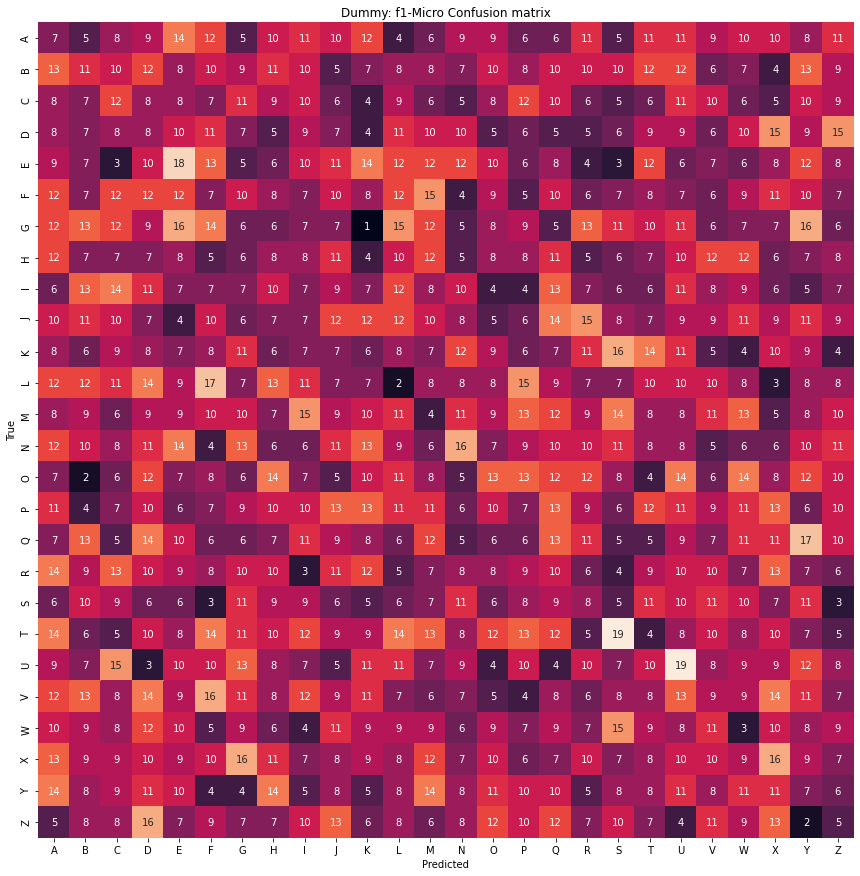

-----------------------------------
Macro:
  Precision: 0.038160189003012455
  Recall: 0.03804562312430722
  f1-macro: 0.03798068696468826


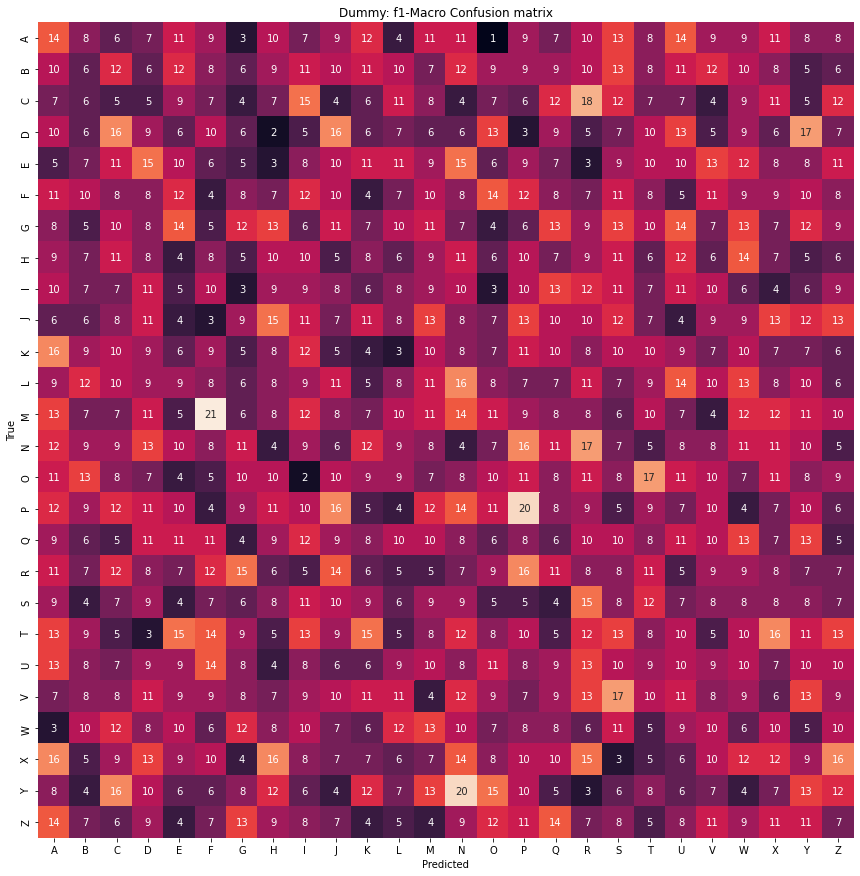

-----------------------------------

Gaussian Naive Bayes Classifier:
Micro:
  Precision: 0.6901666666666667
  Recall: 0.6901666666666667
  f1-micro: 0.6901666666666667


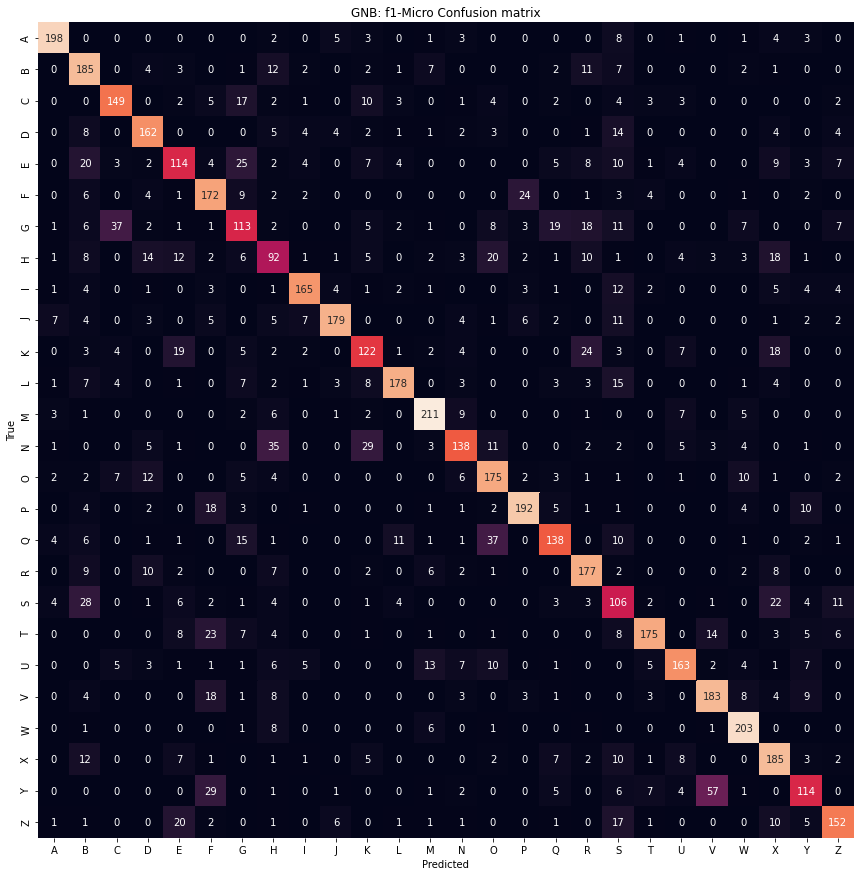

-----------------------------------
Macro:
  Precision: 0.6962723035244488
  Recall: 0.6884672353252179
  f1-macro: 0.688426723532687


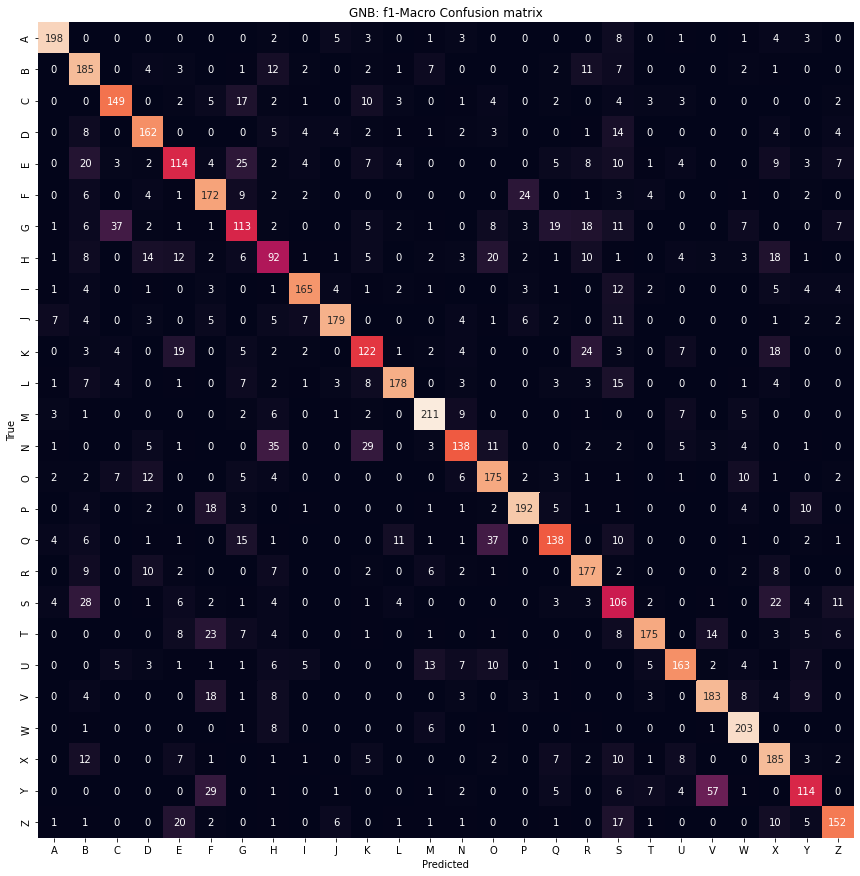

-----------------------------------

kNN Classifier:
Micro:
  Precision: 0.9556666666666667
  Recall: 0.9556666666666667
  f1-micro: 0.9556666666666667


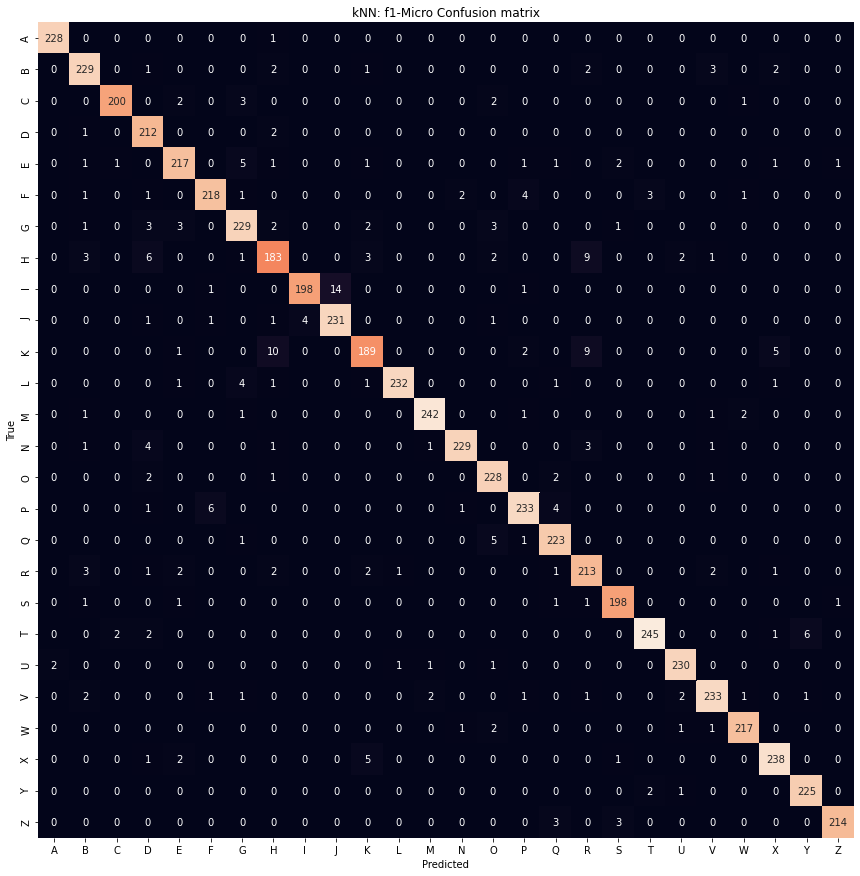

-----------------------------------
Macro:
  Precision: 0.9557691034625017
  Recall: 0.9552963298938391
  f1-macro: 0.9553126937497217


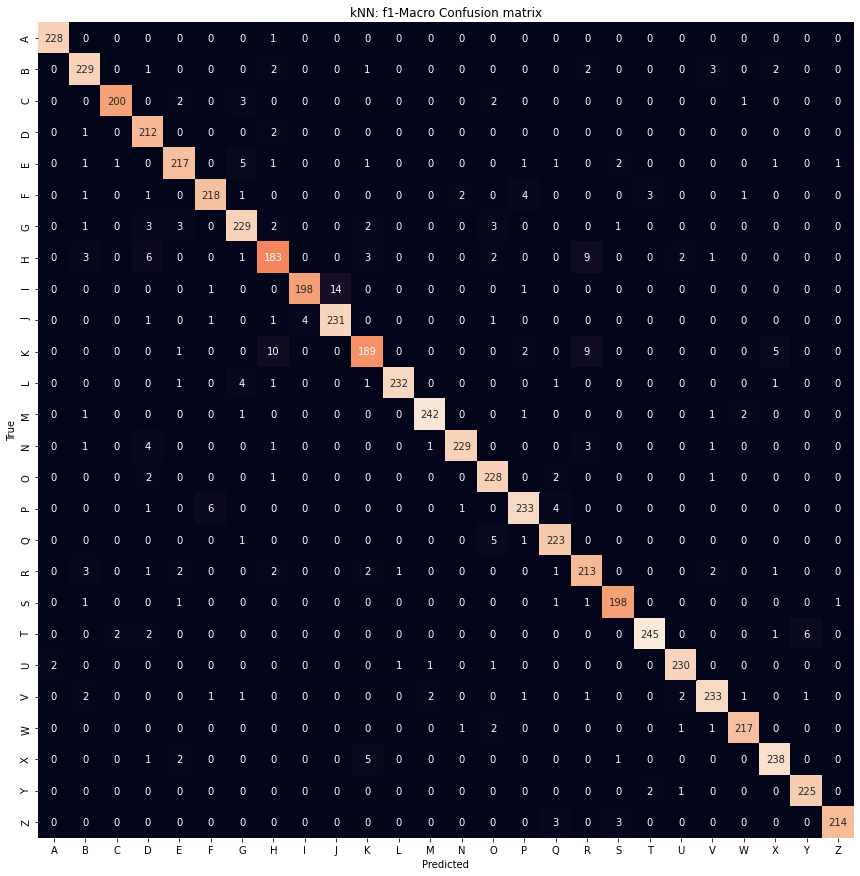

In [ ]:
dc_macro.fit(X2_train, y2_train)
preds_dc_macro = dc_macro.predict(X2_test)

dc_micro.fit(X2_train, y2_train)
preds_dc_micro = dc_micro.predict(X2_test)

gnb_macro.fit(X2_train, y2_train)
preds_gnb_macro = gnb_macro.predict(X2_test)

gnb_micro.fit(X2_train, y2_train)
preds_gnb_micro = gnb_micro.predict(X2_test)

kNN_macro.fit(X2_train, y2_train)
preds_kNN_macro = kNN_macro.predict(X2_test)

kNN_micro.fit(X2_train, y2_train)
preds_kNN_micro = kNN_micro.predict(X2_test)

print("Dummy Classifier:")
dc_cr = precision_recall_fscore_support(y2_test, preds_dc_micro, average='micro')
print("Micro:")
print("  Precision:", dc_cr[0])
print("  Recall:", dc_cr[1])
print("  f1-micro:", dc_cr[2])
conf_matrix(preds_dc_micro, y2_test, "Dummy: f1-Micro ", np.unique(label2), 2)
print("-----------------------------------")
dc_cr2 = precision_recall_fscore_support(y2_test, preds_dc_macro, average='macro')
print("Macro:")
print("  Precision:", dc_cr2[0])
print("  Recall:", dc_cr2[1])
print("  f1-macro:", dc_cr2[2])
conf_matrix(preds_dc_macro, y2_test, "Dummy: f1-Macro ", np.unique(label2), 2)
print("-----------------------------------\n")

print("Gaussian Naive Bayes Classifier:")
gnb_cr = precision_recall_fscore_support(y2_test, preds_gnb_micro, average='micro')
print("Micro:")
print("  Precision:", gnb_cr[0])
print("  Recall:", gnb_cr[1])
print("  f1-micro:", gnb_cr[2])
conf_matrix(preds_gnb_micro, y2_test, "GNB: f1-Micro ", np.unique(label2), 2)
print("-----------------------------------")
gnb_cr2 = precision_recall_fscore_support(y2_test, preds_gnb_macro, average='macro')
print("Macro:")
print("  Precision:", gnb_cr2[0])
print("  Recall:", gnb_cr2[1])
print("  f1-macro:", gnb_cr2[2])
conf_matrix(preds_gnb_macro, y2_test, "GNB: f1-Macro ", np.unique(label2), 2)
print("-----------------------------------\n")

print("kNN Classifier:")
knn_cr = precision_recall_fscore_support(y2_test, preds_kNN_micro, average='micro')
print("Micro:")
print("  Precision:", knn_cr[0])
print("  Recall:", knn_cr[1])
print("  f1-micro:", knn_cr[2])
conf_matrix(preds_kNN_micro, y2_test, "kNN: f1-Micro ", np.unique(label2), 2)
print("-----------------------------------")
knn_cr2 = precision_recall_fscore_support(y2_test, preds_kNN_macro, average='macro')
print("Macro:")
print("  Precision:", knn_cr2[0])
print("  Recall:", knn_cr2[1])
print("  f1-macro:", knn_cr2[2])
conf_matrix(preds_kNN_macro, y2_test, "kNN: f1-Macro ", np.unique(label2), 2)

Η ίδια μεθοδολογία ακολουθήθηκε και για τους υπόλοιπους ταξινομητές, όπως παρουσιάζονται στη συνέχεια.

###### MLP


MLP Micro:
Συνολικός χρόνος fit και predict: 16693.115732192993 seconds
-------------------------------------------------------------
MLP Macro:
Συνολικός χρόνος fit και predict: 17279.245817661285 seconds
-------------------------------------------------------------
{'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (200,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 1200, 'mlp__solver': 'adam', 'pca__n_components': 16} 

{'mlp__activation': 'tanh', 'mlp__alpha': 1e-05, 'mlp__hidden_layer_sizes': (200,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 1200, 'mlp__solver': 'adam', 'pca__n_components': 16}
------------------------------------------------------------------------------
MLP Classifier:
Micro:
  Precision: 0.9671666666666666
  Recall: 0.9671666666666666
  f1-micro: 0.9671666666666666


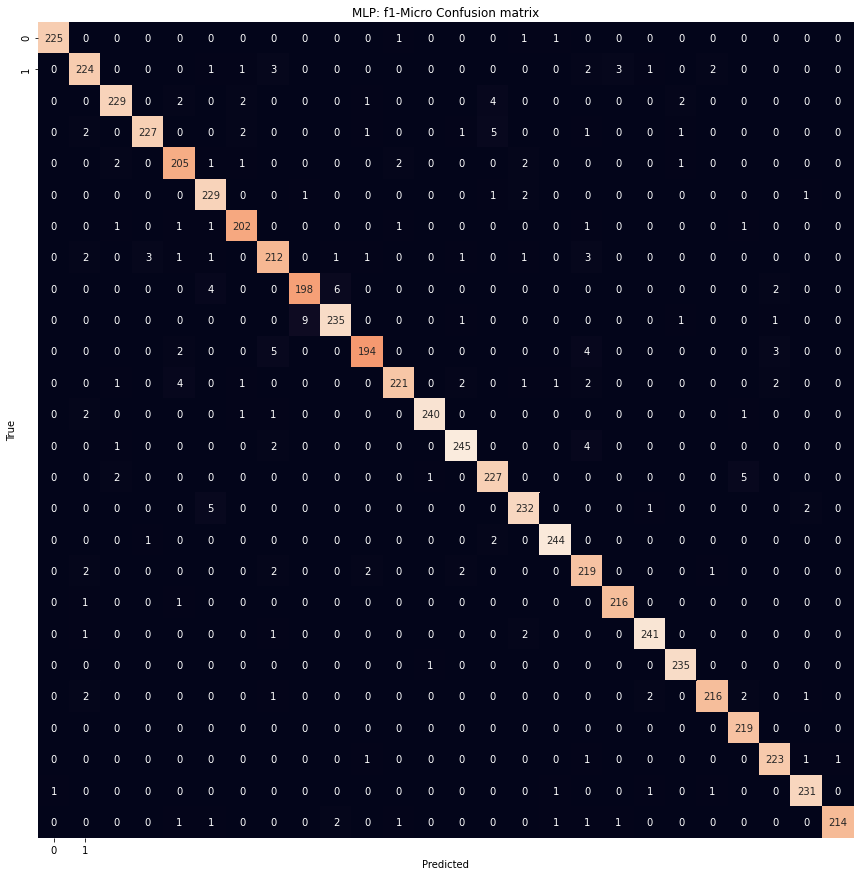

--------------------------------------------------------
Macro:
  Precision: 0.9643971654599302
  Recall: 0.9645138565981394
  f1-macro: 0.9643525634032655


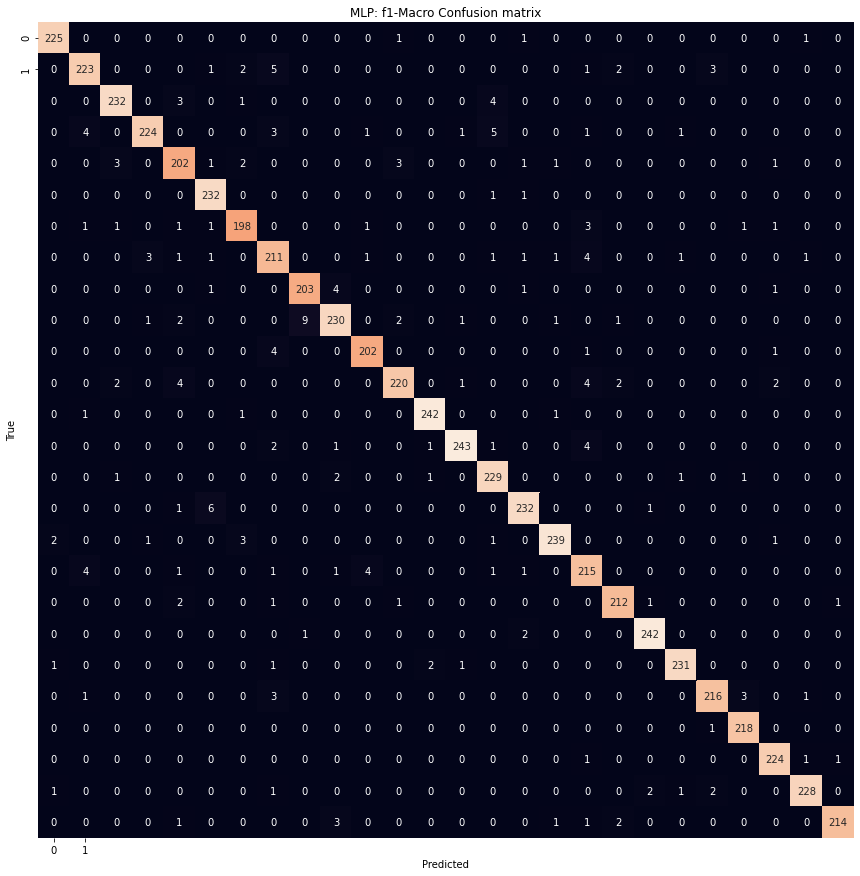

--------------------------------------------------------


In [ ]:
# initialize
selector = VarianceThreshold()
scaler = MinMaxScaler()
ros = RandomOverSampler()
pca = PCA()

n_components = [15, 16]                                    
pipe_mlp = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)])
 
hidden = [(150,), (200,)]
activation = ['tanh', 'relu']
solver = ['adam']
max_iter = [1200]
lrate = ['constant', 'invscaling']
alpha =[1e-05, 1e-04]

estimator_mlp_micro = GridSearchCV(pipe_mlp, dict(pca__n_components=n_components, mlp__hidden_layer_sizes=hidden, mlp__activation=activation, mlp__solver=solver, mlp__max_iter=max_iter, mlp__learning_rate=lrate, mlp__alpha=alpha), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator_mlp_micro.fit(X2_train, y2_train)
preds_mlp_micro = estimator_mlp_micro.predict(X2_test)
print("MLP Micro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_mlp_macro = GridSearchCV(pipe_mlp, dict(pca__n_components=n_components, mlp__hidden_layer_sizes=hidden, mlp__activation=activation, mlp__solver=solver, mlp__max_iter=max_iter, mlp__learning_rate=lrate, mlp__alpha=alpha), cv=5, scoring='f1_macro', n_jobs=-1) 

start_time = time.time()
estimator_mlp_macro.fit(X2_train, y2_train)
preds_mlp_macro = estimator_mlp_macro.predict(X2_test)
print("MLP Macro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")
 
 
mlp_micro = estimator_mlp_micro.best_estimator_
mlp_macro = estimator_mlp_macro.best_estimator_
 
print(estimator_mlp_micro.best_params_, "\n")
print(estimator_mlp_macro.best_params_)
print("------------------------------------------------------------------------------")
 
mlp_macro.fit(X2_train, y2_train)
preds_mlp_macro = mlp_macro.predict(X2_test)
 
mlp_micro.fit(X2_train, y2_train)
preds_mlp_micro = mlp_micro.predict(X2_test)
 
print("MLP Classifier:")
mlp_cr = precision_recall_fscore_support(y2_test, preds_mlp_micro, average='micro')
print("Micro:")
print("  Precision:", mlp_cr[0])
print("  Recall:", mlp_cr[1])
print("  f1-micro:", mlp_cr[2])
conf_matrix(preds_mlp_micro, y2_test, "MLP: f1-Micro ", ["0", "1"], 2)
print("--------------------------------------------------------")
mlp_cr2 = precision_recall_fscore_support(y2_test, preds_mlp_macro, average='macro')
print("Macro:")
print("  Precision:", mlp_cr2[0])
print("  Recall:", mlp_cr2[1])
print("  f1-macro:", mlp_cr2[2])
conf_matrix(preds_mlp_macro, y2_test, "MLP: f1-Macro ", ["0", "1"], 2)
print("--------------------------------------------------------")


###### Linear SVM

Linear SVM Micro:
Συνολικός χρόνος fit και predict: 6325.9923095703125 seconds
-------------------------------------------------------------
Linear SVM Macro:
Συνολικός χρόνος fit και predict: 6930.71506857872 seconds
-------------------------------------------------------------
Micro best  {'l_svm__C': 10.0, 'l_svm__loss': 'squared_hinge', 'l_svm__multi_class': 'ovr', 'l_svm__tol': 1e-29, 'pca__n_components': 16} 

Macro best  {'l_svm__C': 10.0, 'l_svm__loss': 'squared_hinge', 'l_svm__multi_class': 'ovr', 'l_svm__tol': 1e-27, 'pca__n_components': 16}
-------------------------------------------------------------
Linear SVM Classifier
Micro:
  Precision: 0.6971666666666667
  Recall: 0.6971666666666667
  f1-micro: 0.6971666666666667


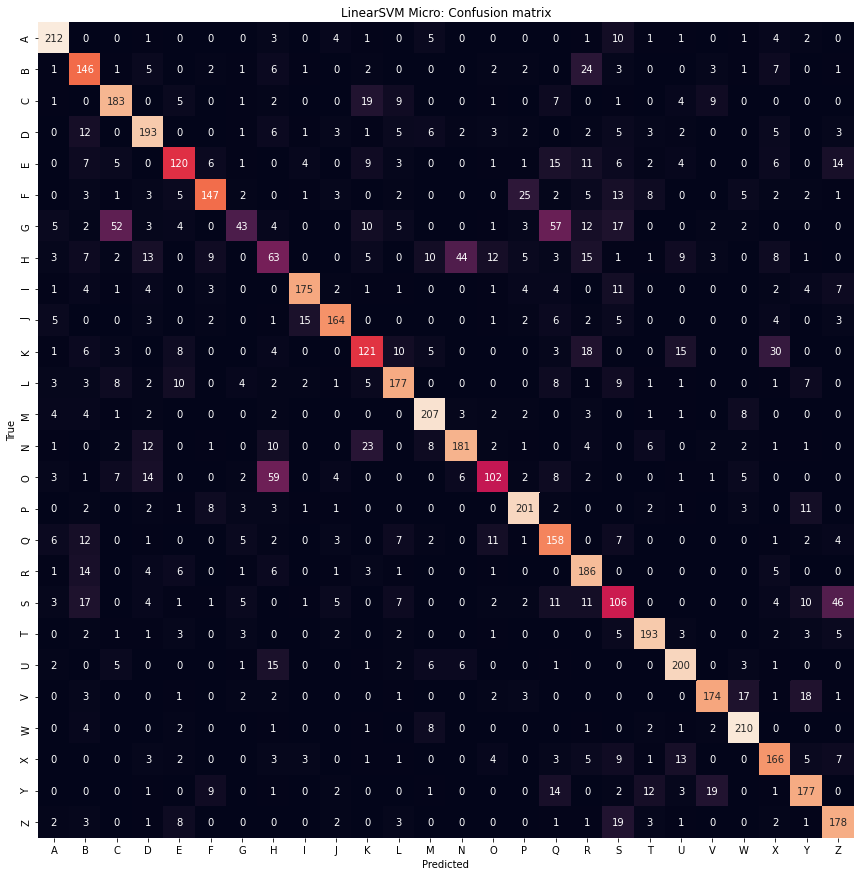

--------------------------------------------------------
Macro:
  Precision: 0.703596937214447
  Recall: 0.6967361638494736
  f1-macro: 0.6905831010423218


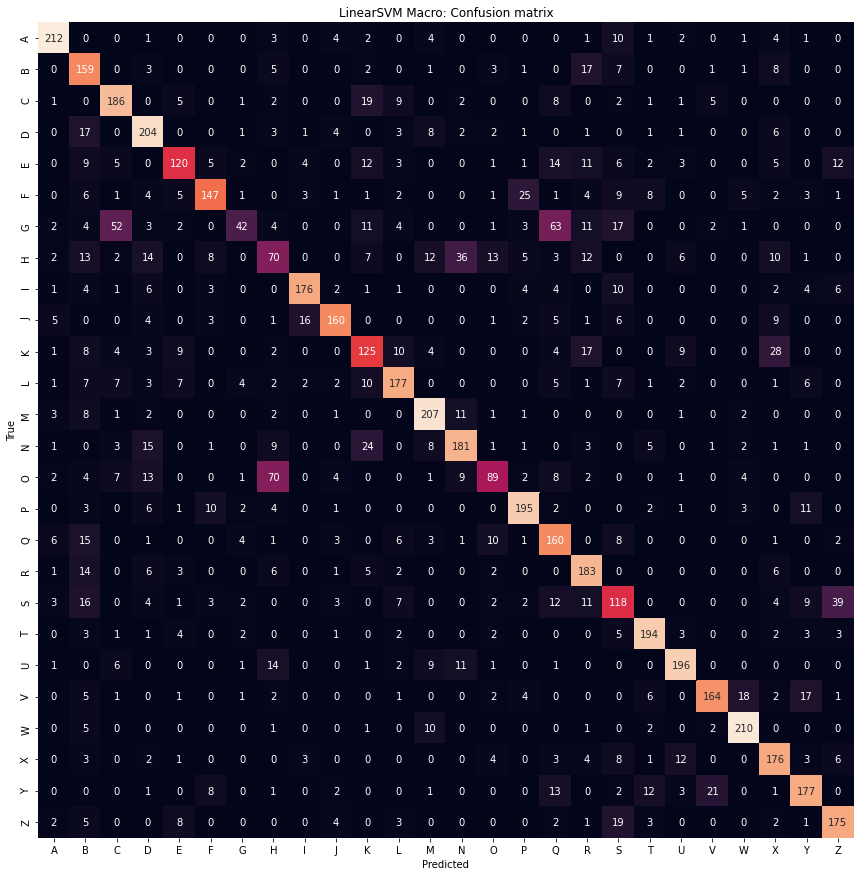

--------------------------------------------------------


In [ ]:
# initialize
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
l_svm = LinearSVC()

# parameters
multi_class = ['ovr']
loss = ['hinge', 'squared_hinge']
tol = [1e-29, 1e-28, 1e-27, 1e26, 1e-25, 1e-24, 1e-23]
C = [1.0, 10.0, 20.0]
n_components = [13, 14, 15, 16, 17, 18]

pipe_l_svm = Pipeline(steps=[ ('scaler', scaler), ('sampler', ros), ('pca', pca), ('l_svm', l_svm) ], memory='tmp')

estimator_l_svm_micro = GridSearchCV(pipe_l_svm, dict(pca__n_components=n_components, l_svm__multi_class=multi_class, l_svm__loss=loss, l_svm__tol=tol, l_svm__C=C), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator_l_svm_micro.fit(X2_train, y2_train)
preds_l_svm_micro = estimator_l_svm_micro.predict(X2_test)
print("Linear SVM Micro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_l_svm_macro = GridSearchCV(pipe_l_svm, dict(pca__n_components=n_components, l_svm__multi_class=multi_class, l_svm__loss=loss, l_svm__tol=tol, l_svm__C=C), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator_l_svm_macro.fit(X2_train, y2_train)
preds_l_svm_macro = estimator_l_svm_macro.predict(X2_test)
print("Linear SVM Macro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time()-start_time))
print("-------------------------------------------------------------")

l_svm_micro = estimator_l_svm_micro.best_estimator_
l_svm_macro = estimator_l_svm_macro.best_estimator_

print("Micro best ", estimator_l_svm_micro.best_params_, "\n")
print("Macro best ", estimator_l_svm_macro.best_params_)
print("-------------------------------------------------------------")

l_svm_micro.fit(X2_train, y2_train)
preds_l_svm_micro = l_svm_micro.predict(X2_test)

l_svm_macro.fit(X2_train, y2_train)
preds_l_svm_macro = l_svm_macro.predict(X2_test)

print("Linear SVM Classifier")
l_svm_cr = precision_recall_fscore_support(y2_test, preds_l_svm_micro, average='micro')
print("Micro:")
print("  Precision:", l_svm_cr[0])
print("  Recall:", l_svm_cr[1])
print("  f1-micro:", l_svm_cr[2])
conf_matrix(preds_l_svm_micro, y2_test, "LinearSVM Micro: ", np.unique(label2), 2)
print("--------------------------------------------------------")

l_svm_cr = precision_recall_fscore_support(y2_test, preds_l_svm_macro, average='macro')
print("Macro:")
print("  Precision:", l_svm_cr[0])
print("  Recall:", l_svm_cr[1])
print("  f1-macro:", l_svm_cr[2])
conf_matrix(preds_l_svm_macro, y2_test, "LinearSVM Macro: ", np.unique(label2), 2)
print("--------------------------------------------------------")


###### Polynomial SVM

Poly-SVM Micro:
Συνολικός χρόνος fit και predict: 291.3689136505127 seconds
-------------------------------------------------------------
Poly-SVM Macro:
Συνολικός χρόνος fit και predict: 280.04358673095703 seconds
-------------------------------------------------------------
Micro best  {'poly__C': 45, 'poly__degree': 3, 'poly__gamma': 'scale', 'poly__tol': 1e-13} 

Macro best  {'poly__C': 45, 'poly__degree': 3, 'poly__gamma': 'scale', 'poly__tol': 1e-13}
-------------------------------------------------------------
Polynomial SVM Classifier
Micro:
  Precision: 0.9505
  Recall: 0.9505
  f1-micro: 0.9505


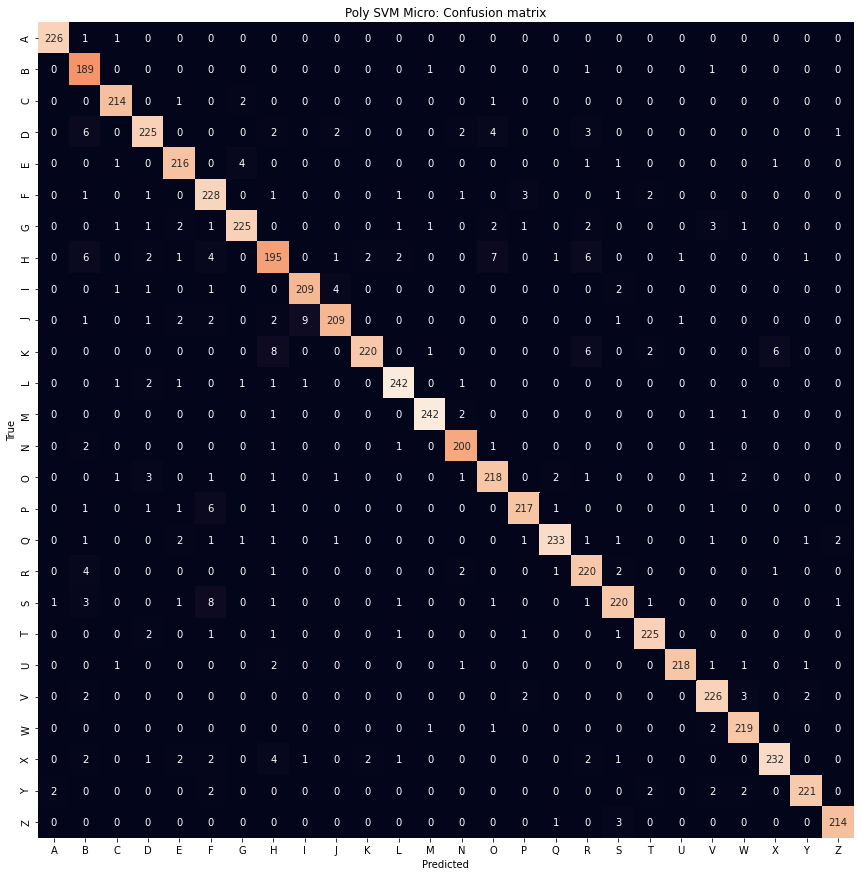

--------------------------------------------------------
Macro:
  Precision: 0.9507303118800602
  Recall: 0.9511801037865942
  f1-macro: 0.9505644117655014


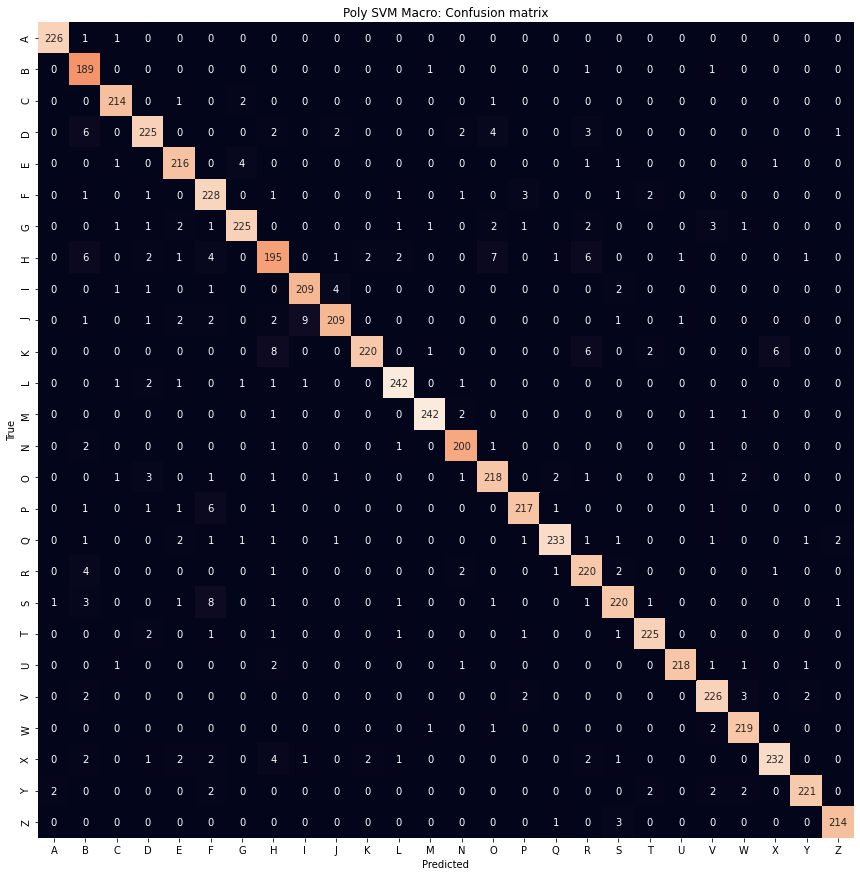

--------------------------------------------------------


In [ ]:
# initialize
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
poly_svm = SVC(kernel='poly')

# parameters 
n_components = [13, 14, 15, 16, 17, 18]
C = [44, 45, 46]
degree = [2, 3, 4]
gamma = ['scale', 'auto']
tol = [1e-13, 1e-12]

pipe_poly = Pipeline(steps=[('sampler', ros), ('scaler', scaler), ('poly', poly_svm)], memory = 'tmp')

estimator_poly_micro = GridSearchCV(pipe_poly, dict(poly__C = C, poly__degree = degree, poly__gamma = gamma, poly__tol = tol), cv=5, scoring='f1_micro', n_jobs=-1)

start_time = time.time()
estimator_poly_micro.fit(X2_train, y2_train)
preds_poly_micro = estimator_poly_micro.predict(X2_test)
print("Poly-SVM Micro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_poly_macro = GridSearchCV(pipe_poly, dict(poly__C = C, poly__degree = degree, poly__gamma = gamma, poly__tol = tol),  cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator_poly_macro.fit(X2_train, y2_train)
preds_poly_macro = estimator_poly_macro.predict(X2_test)
print("Poly-SVM Macro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

poly_micro = estimator_poly_micro.best_estimator_
poly_macro = estimator_poly_macro.best_estimator_

print("Micro best ", estimator_poly_micro.best_params_, "\n")
print("Macro best ", estimator_poly_macro.best_params_)
print("-------------------------------------------------------------")

poly_micro.fit(X2_train, y2_train)
preds_poly_micro = poly_micro.predict(X2_test)

poly_macro.fit(X2_train, y2_train)
preds_poly_macro = poly_macro.predict(X2_test)

print("Polynomial SVM Classifier")
poly_cr = precision_recall_fscore_support(y2_test, preds_poly_micro, average='micro')
print("Micro:")
print("  Precision:", poly_cr[0])
print("  Recall:", poly_cr[1])
print("  f1-micro:", poly_cr[2])
conf_matrix(preds_poly_micro, y2_test, "Poly SVM Micro: ", np.unique(label2), 2)
print("--------------------------------------------------------")

poly_cr2 = precision_recall_fscore_support(y2_test, preds_poly_macro, average='macro')
print("Macro:")
print("  Precision:", poly_cr2[0])
print("  Recall:", poly_cr2[1])
print("  f1-macro:", poly_cr2[2])
conf_matrix(preds_poly_macro, y2_test, "Poly SVM Macro: ", np.unique(label2), 2)
print("--------------------------------------------------------")


###### RBF SVM

Rbf-SVM Micro:
Συνολικός χρόνος fit και predict: 2005.7061004638672 seconds
-------------------------------------------------------------
Rbf-SVM Macro:
Συνολικός χρόνος fit και predict: 1990.371885061264 seconds
-------------------------------------------------------------
Micro best  {'pca__n_components': 16, 'rbf__C': 8.4, 'rbf__gamma': 'auto', 'rbf__tol': 1e-13} 

Macro best  {'pca__n_components': 16, 'rbf__C': 8.4, 'rbf__gamma': 'auto', 'rbf__tol': 1e-13}
-------------------------------------------------------------
Rbf SVM Classifier
Micro:
  Precision: 0.9756666666666667
  Recall: 0.9756666666666667
  f1-micro: 0.9756666666666667


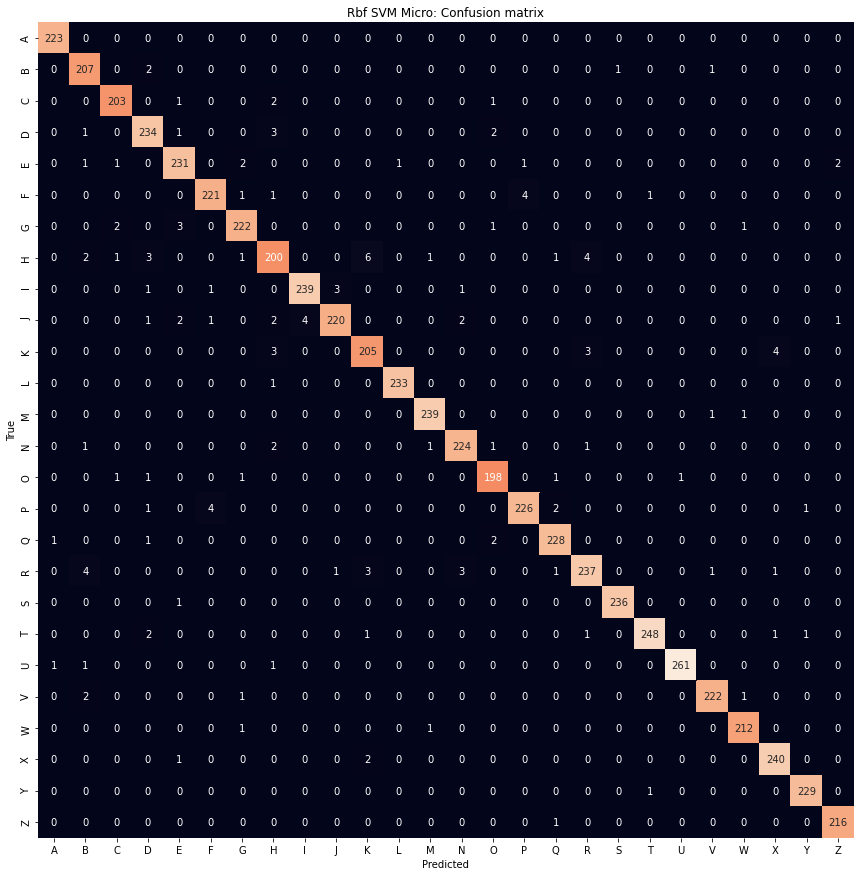

--------------------------------------------------------
Macro:
  Precision: 0.9753372458130306
  Recall: 0.9756280701463618
  f1-macro: 0.9754330674185323


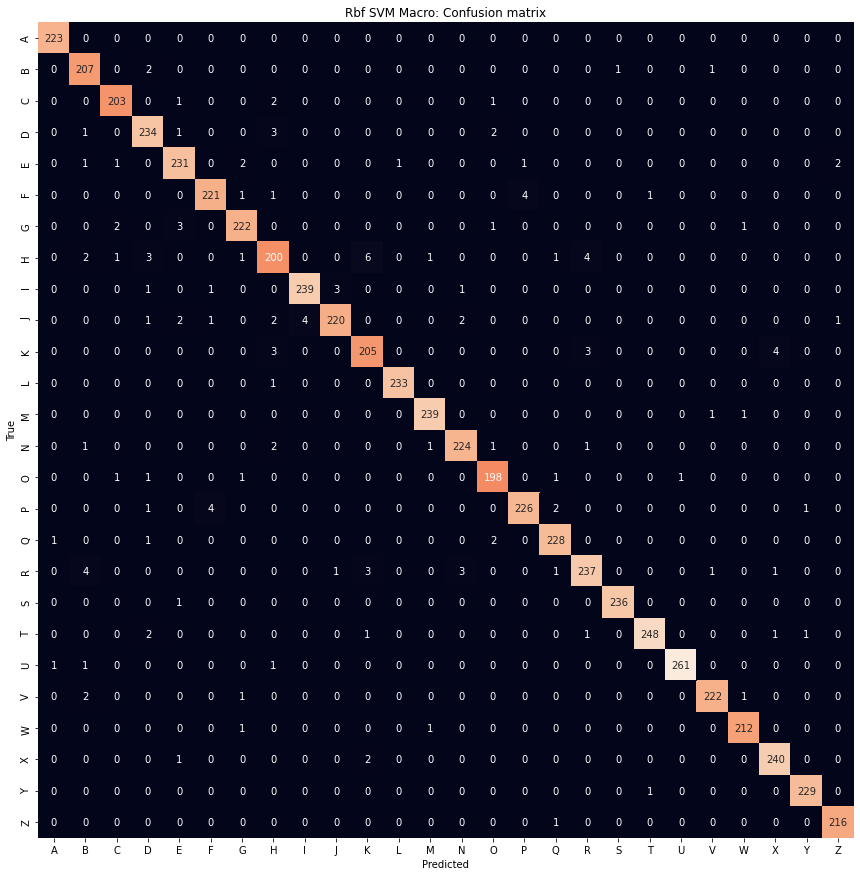

--------------------------------------------------------


In [ ]:
# initialize
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
rbf_svm = SVC(kernel='rbf')

# parameters 
n_components = [14, 15, 16, 17, 18]
C = [8.4, 8.6, 8.8, 9]
degree = [2, 3, 4, 5]
gamma = ['scale', 'auto']
tol = [1e-13, 1e-12]

pipe_rbf = Pipeline(steps=[('sampler', ros), ('pca', pca), ('rbf', rbf_svm)], memory = 'tmp')

estimator_rbf_micro = GridSearchCV(pipe_rbf, dict(pca__n_components=n_components, rbf__C = C, rbf__gamma = gamma, rbf__tol = tol), cv=5, scoring='f1_micro', n_jobs=-1) 

start_time = time.time()
estimator_rbf_micro.fit(X2_train, y2_train)
preds_rbf_micro = estimator_rbf_micro.predict(X2_test)
print("Rbf-SVM Micro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

estimator_rbf_macro = GridSearchCV(pipe_rbf, dict(pca__n_components=n_components, rbf__C = C, rbf__gamma = gamma, rbf__tol = tol), cv=5, scoring='f1_macro', n_jobs=-1)

start_time = time.time()
estimator_rbf_macro.fit(X2_train, y2_train)
preds_rbf_macro = estimator_rbf_macro.predict(X2_test)
print("Rbf-SVM Macro:")
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("-------------------------------------------------------------")

rbf_micro = estimator_rbf_micro.best_estimator_
rbf_macro = estimator_rbf_macro.best_estimator_

print("Micro best ", estimator_rbf_micro.best_params_, "\n")
print("Macro best ", estimator_rbf_macro.best_params_)
print("-------------------------------------------------------------")

rbf_micro.fit(X2_train, y2_train)
preds_rbf_micro = rbf_micro.predict(X2_test)

rbf_macro.fit(X2_train, y2_train)
preds_rbf_macro = rbf_macro.predict(X2_test)

print("Rbf SVM Classifier")
rbf_cr = precision_recall_fscore_support(y2_test, preds_rbf_micro, average='micro')
print("Micro:")
print("  Precision:", rbf_cr[0])
print("  Recall:", rbf_cr[1])
print("  f1-micro:", rbf_cr[2])
conf_matrix(preds_rbf_micro, y2_test, "Rbf SVM Micro: ", np.unique(label2), 2)
print("--------------------------------------------------------")

rbf_cr2 = precision_recall_fscore_support(y2_test, preds_rbf_macro, average='macro')
print("Macro:")
print("  Precision:", rbf_cr2[0])
print("  Recall:", rbf_cr2[1])
print("  f1-macro:", rbf_cr2[2])
conf_matrix(preds_rbf_macro, y2_test, "Rbf SVM Macro: ", np.unique(label2), 2)
print("--------------------------------------------------------")

###### Barplots

Στη συνέχεια, παρουσιάζονται συγκριτικά διαγράμματα της επίδοσης των 6 βελτιστοποιημένων προβλεπτών για τις μετρικές f1-micro και f1-macro, αντίστοιχα.

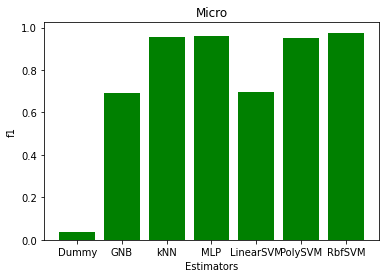

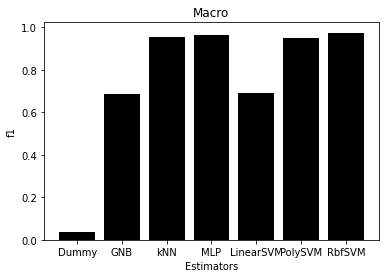

In [ ]:
plt.bar(["Dummy", "GNB", "kNN", "MLP", "LinearSVM", "PolySVM", "RbfSVM"], [dc_cr[2], gnb_cr[2], knn_cr[2], 0.9671666666666666, 0.6971666666666667, 0.9505, 0.9756666666666667], color="green")
plt.title("Micro")
plt.xlabel("Estimators")
plt.ylabel("f1")
plt.show()

plt.bar(["Dummy", "GNB", "kNN", "MLP", "LinearSVM", "PolySVM", "RbfSVM"], [dc_cr2[2], gnb_cr2[2], knn_cr2[2], 0.9643525634032655, 0.6905831010423218, 0.9505644117655014, 0.9754330674185323], color="black")
plt.title("Macro")
plt.xlabel("Estimators")
plt.ylabel("f1")
plt.show()

###### Σχολιασμός αποτελεσμάτων

Όπως παρατηρούμε παραπάνω, με την εξαίρεση του Dummy classifier, η απόδοση του οποίου δεν μπορεί να βελτιστοποιηθεί, έχουμε πετύχει τη βελτιστοποίηση των ταξινομητών μας. Παρουσιάζουμε, εν συνεχεία, τα αποτελέσματα πριν (baseline classification) και μετά τη βελτιστοποίηση, καθώς και την αύξηση που αυτή προκάλεσε:

<br>

|           | Baseline Micro | Optimized Micro | Micro Difference | Baseline Macro | Optimized Macro | Macro Difference |
|:---------:|:--------------:|:---------------:|:----------------:|:--------------:|:---------------:|:----------------:|
|   Dummy   |      0.036     |        -        |         0        |      0.036     |        -        |         0        |
|    GNB    |      0.645     |       0.69      |    0.045 (7%)    |      0.639     |      0.688      |    0.049 (8%)    |
|    kNN    |      0.946     |      0.956      |     0.01 (1%)    |      0.946     |      0.955      |    0.009 (1%)    |
|    MLP    |      0.925     |      0.967      |    0.042 (5%)    |      0.924     |      0.964      |    0.040 (4%)    |
| LinearSVM |      0.556     |      0.697      |    0.141 (25%)   |      0.546     |      0.691      |    0.145 (27%)   |
|  PolySVM  |      0.946     |      0.951      |    0.005 (1%)    |      0.946     |      0.951      |    0.005 (1%)    |
|   RBFSVM  |      0.924     |      0.976      |    0.052 (6%)    |      0.924     |      0.975      |    0.051 (6%)    |

<br>

Παρατηρούμε, αρχικά, ότι όσον αφορά τον GNB, η τιμή του οποίου δεν ήταν ιδιαίτερα ικανοποιητική στη βασική ταξινόμηση, η βελτίωση της επίδοσης είναι υπολογίσιμη, αλλά όχι αρκετή ώστε να καταστήσει τον συγκεκριμένο προβλεπτή καλή επιλογή για το υπό μελέτη dataset. Από την άλλη, στην περίπτωση του LinearSVM, παρατηρείται μια σημαντική αύξηση των επιδόσεων, της τάξης του 25%. Αν και με τη βελτίωση αυτή πετυχαίνουμε επίδοση αντίστοιχη του GNB, και πάλι δε φτάνουμε τα επίπεδα των βέλτιστων αρχιτεκτονικών.  
Αναφορικά με τους υπόλοιπους ταξινομητές, όπως προβλέψαμε, η διαδικασία βελτιστοποίησης της αρχιτεκτονικής δεν είχε ιδιαίτερα εντυπωσιακά αποτελέσματα, μιας και η ακρίβεια προβλέψεών τους ήταν ήδη πολύ υψηλή ακόμα και με τις default παραμέτρους. Παρόλ' αυτά, στις περιπτώσεις των MLP και RBF SVM πετύχαμε βελτίωση των μετρικών f1-score μεταξύ του 4 και 6%. Με τον τρόπο αυτό, το RBF SVM αναδείχθηκε η καλύτερη λύση στο συγκεκριμένο σύνολο δεδομένων, με το MLP να ακολουθεί. Επισημαίνουμε, πάντως, ότι και τα kNN και PolySVM παρά την ελάχιστη αύξηση της ακρίβειάς τους απέδωσαν εξαιρετικά καλά.